# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [3]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\2954675577.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')


In [4]:
loan_data = loan_data_backup.copy()

## Explore Data

In [6]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83     C  ...   
2                2400.0   36 months     15.96        84.33     C  ...   
3               10000.0   36 months     13.49       339.31     C  ...   
4                3000.0   60 months     12.69        67.79     B  ...   
...                 ...         ...       ...          ...   ...  ...   
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
0               NaN     NaN         NaN         NaN         NaN      NaN   
1               NaN     NaN         NaN         NaN         NaN      NaN   
2               NaN     NaN         NaN         NaN         NaN      NaN   
3               NaN     NaN         NaN         NaN         NaN      NaN   
4               NaN     NaN         NaN         NaN         NaN      NaN   
...             ...     ...         ...         ...         ...      ...   
466280          NaN     NaN         NaN         NaN         NaN      NaN   
466281          NaN     NaN         NaN         NaN         NaN      NaN   
466282          NaN     NaN         NaN         NaN         NaN      NaN   
466283          NaN     NaN         NaN         NaN         NaN      NaN   
466284          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
0                   NaN    NaN         NaN          NaN  
1                   NaN    NaN         NaN          NaN  
2                   NaN    NaN         NaN          NaN  
3                   NaN    NaN         NaN          NaN  
4                   NaN    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
466280          29900.0    NaN         NaN          NaN  
466281          39400.0    NaN         NaN          NaN  
466282          13100.0    NaN         NaN          NaN  
466283          53100.0    NaN         NaN          NaN  
466284          16000.0    NaN         NaN          NaN  

[466285 rows x 75 columns]

In [7]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [8]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [9]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [10]:
loan_data.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [11]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [12]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [15]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [17]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

In [18]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [19]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [20]:
loan_data['earliest_cr_line']
# Displays a column.

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [21]:
def adjust_century(date_str): 
    if isinstance(date_str, str): 
        year_suffix = int(date_str[-2:]) 
        if year_suffix <= 24: 
            return date_str[:-2] + '20' + date_str[-2:] 
        else: 
            return date_str[:-2] + '19' + date_str[-2:] 
    else: 
        # Handle non-string (NaN or other types) cases 
        return pd.NaT

# Apply the function to the 'earliest_cr_line' column 
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(adjust_century) 
# Convert the adjusted dates to datetime format 
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'], format='%b-%Y', errors='coerce') 
# Extracts the date and the time from a string variable that is in a given format. 

In [22]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [24]:
loan_data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']).dt.days /30.4375) 
# We calculate the difference between two dates in months, turn it to numeric datatype and round it. 
# We save the result in a new variable. 

In [25]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

### Homework

In [27]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data.loc[: , ['term','term_int']]

term  term_int
0        36 months        36
1        60 months        60
2        36 months        36
3        36 months        36
4        60 months        60
...            ...       ...
466280   60 months        60
466281   60 months        60
466282   60 months        60
466283   36 months        36
466284   36 months        36

[466285 rows x 2 columns]

In [28]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [29]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [30]:
def adjust_century(date_str): 
    if isinstance(date_str, str): 
        year_suffix = int(date_str[-2:]) 
        if year_suffix <= 24: 
            return date_str[:-2] + '20' + date_str[-2:] 
        else: 
            return date_str[:-2] + '19' + date_str[-2:] 
    else: 
        # Handle non-string (NaN or other types) cases 
        return pd.NaT

# Apply the function to the 'earliest_cr_line' column 
loan_data['issue_d_date'] = loan_data['issue_d'].apply(adjust_century) 
# Convert the adjusted dates to datetime format 
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d_date'], format='%b-%Y', errors='coerce') 

loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']).dt.days /30.4375))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data.loc[: , ['issue_d','issue_d_date','mths_since_issue_d']]
# Shows some descriptive statisics for the values of a column.

issue_d issue_d_date  mths_since_issue_d
0       Dec-11   2011-12-01                72.0
1       Dec-11   2011-12-01                72.0
2       Dec-11   2011-12-01                72.0
3       Dec-11   2011-12-01                72.0
4       Dec-11   2011-12-01                72.0
...        ...          ...                 ...
466280  Jan-14   2014-01-01                47.0
466281  Jan-14   2014-01-01                47.0
466282  Jan-14   2014-01-01                47.0
466283  Jan-14   2014-01-01                47.0
466284  Jan-14   2014-01-01                47.0

[466285 rows x 3 columns]

### Preprocessing few discrete variables

In [32]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [34]:
pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

A      B      C      D      E      F      G
0       False   True  False  False  False  False  False
1       False  False   True  False  False  False  False
2       False  False   True  False  False  False  False
3       False  False   True  False  False  False  False
4       False   True  False  False  False  False  False
...       ...    ...    ...    ...    ...    ...    ...
466280  False  False   True  False  False  False  False
466281  False  False  False   True  False  False  False
466282  False  False  False   True  False  False  False
466283   True  False  False  False  False  False  False
466284  False  False  False   True  False  False  False

[466285 rows x 7 columns]

In [35]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0         False     True    False    False    False    False    False
1         False    False     True    False    False    False    False
2         False    False     True    False    False    False    False
3         False    False     True    False    False    False    False
4         False     True    False    False    False    False    False
...         ...      ...      ...      ...      ...      ...      ...
466280    False    False     True    False    False    False    False
466281    False    False    False     True    False    False    False
466282    False    False    False     True    False    False    False
466283     True    False    False    False    False    False    False
466284    False    False    False     True    False    False    False

[466285 rows x 7 columns]

In [36]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [37]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [38]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [40]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [42]:
loan_data.isnull()
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [43]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [44]:
pd.options.display.max_rows = 100
# Sets the pandas dataframe options to display 100 columns/ rows.

In [45]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt']).infer_objects()
# We fill the missing values with the values of another variable.

In [46]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

### Homework

In [48]:
loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean()).infer_objects()
loan_data['annual_inc'] = loan_data['annual_inc']
loan_data['annual_inc'].isnull().sum()

0

In [49]:
loan_data.loc[0:200 , ['mths_since_earliest_cr_line','acc_now_delinq','total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']]

mths_since_earliest_cr_line  acc_now_delinq  total_acc  pub_rec  \
0                          395.0             0.0        9.0      0.0   
1                          224.0             0.0        4.0      0.0   
2                          193.0             0.0       10.0      0.0   
3                          262.0             0.0       37.0      0.0   
4                          263.0             0.0       38.0      0.0   
..                           ...             ...        ...      ...   
196                        372.0             0.0       18.0      0.0   
197                        192.0             0.0       21.0      0.0   
198                        182.0             0.0       25.0      0.0   
199                        229.0             0.0       17.0      0.0   
200                        169.0             0.0       14.0      0.0   

     open_acc  inq_last_6mths  delinq_2yrs  emp_length_int  
0         3.0             1.0          0.0            10.0  
1         3.0             5.0          0.0             0.0  
2         2.0             2.0          0.0            10.0  
3        10.0             1.0          0.0            10.0  
4        15.0             0.0          0.0             1.0  
..        ...             ...          ...             ...  
196       8.0             1.0          0.0            10.0  
197      13.0             1.0          0.0             5.0  
198      11.0             2.0          0.0             4.0  
199       7.0             1.0          0.0             6.0  
200       4.0             1.0          0.0             5.0  

[201 rows x 8 columns]

In [50]:
# List of columns to process
columns_to_fill = [
    'mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc', 
    'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int'
]

# Fill NaN values with 0 and infer object types
for column in columns_to_fill:
    loan_data[column] = loan_data[column].fillna(0).infer_objects()

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [54]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [55]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [56]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [57]:
loan_data['loan_status'].count()

466285

In [58]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 1, 0)
# We create a new variable that has the value of '1' if a condition is met, and the value of '0' if it is not met.

In [59]:
loan_data.loc[: , ['loan_status','good_bad']]

loan_status  good_bad
0        Fully Paid         0
1       Charged Off         1
2        Fully Paid         0
3        Fully Paid         0
4           Current         0
...             ...       ...
466280      Current         0
466281  Charged Off         1
466282      Current         0
466283   Fully Paid         0
466284      Current         0

[466285 rows x 2 columns]

### Splitting Data

In [61]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [62]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 214812      214812   1323889    1568906      12000        12000   
 202627      202627   1475490    1733230      13700        13700   
 211153      211153   1373774    1618044      15000        15000   
 459321      459321  10595846   12527919       8000         8000   
 359273      359273  20157756   22420449      10000        10000   
 ...            ...       ...        ...        ...          ...   
 155709      155709   3676131    4639324      26500        26500   
 97836        97836   6907182    8549190       5600         5600   
 205570      205570   1444981    1697375       7500         7500   
 145091      145091   4545121    5797309      35000        35000   
 83281        83281   7656386    9338449       9000         9000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 214812          12000.0   36 months     16.29       423.61     C        C5   
 202627          13700.0

In [63]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [64]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(349713, 207)

In [65]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(349713,)

In [66]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(116572, 207)

In [67]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(116572,)

In [68]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multiple times.
# This means, to assign the exact same observations to the train and test datasets.

In [69]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(373028, 207)

In [70]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(373028,)

In [71]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(93257, 207)

In [72]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(93257,)

### Data Preparation: An Example

In [74]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train


In [75]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [76]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

grade  good_bad
427211     A         0
206088     C         0
136020     A         0
412305     D         1
36159      C         1

In [77]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654

In [78]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A  0.038956
1     B  0.078985
2     C  0.114230
3     D  0.153696
4     E  0.194743
5     F  0.245584
6     G  0.272042

In [79]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [80]:
df1

grade  good_bad grade  good_bad
0     A     59759     A  0.038956
1     B    109730     B  0.078985
2     C    100245     C  0.114230
3     D     61498     D  0.153696
4     E     28612     E  0.194743
5     F     10530     F  0.245584
6     G      2654     G  0.272042

In [81]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

grade  good_bad  good_bad
0     A     59759  0.038956
1     B    109730  0.078985
2     C    100245  0.114230
3     D     61498  0.153696
4     E     28612  0.194743
5     F     10530  0.245584
6     G      2654  0.272042

In [82]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_bad']
# Changes the names of the columns of a dataframe.
df1

grade   n_obs  prop_bad
0     A   59759  0.038956
1     B  109730  0.078985
2     C  100245  0.114230
3     D   61498  0.153696
4     E   28612  0.194743
5     F   10530  0.245584
6     G    2654  0.272042

In [83]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

grade   n_obs  prop_bad  prop_n_obs
0     A   59759  0.038956    0.160200
1     B  109730  0.078985    0.294160
2     C  100245  0.114230    0.268733
3     D   61498  0.153696    0.164862
4     E   28612  0.194743    0.076702
5     F   10530  0.245584    0.028228
6     G    2654  0.272042    0.007115

In [84]:
df1['n_bad'] = df1['prop_bad'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_good'] = (1 - df1['prop_bad']) * df1['n_obs']
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good
0     A   59759  0.038956    0.160200   2328.0   57431.0
1     B  109730  0.078985    0.294160   8667.0  101063.0
2     C  100245  0.114230    0.268733  11451.0   88794.0
3     D   61498  0.153696    0.164862   9452.0   52046.0
4     E   28612  0.194743    0.076702   5572.0   23040.0
5     F   10530  0.245584    0.028228   2586.0    7944.0
6     G    2654  0.272042    0.007115    722.0    1932.0

In [85]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   
1     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
2     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
5     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
6     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   

   prop_n_bad  
0    0.057090  
1    0.212541  
2    0.280813  
3    0.231792  
4    0.136642  
5    0.063417  
6    0.017706

In [86]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a next variable.
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   
1     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
2     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
5     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
6     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   

   prop_n_bad       WoE  
0    0.057090  1.107830  
1    0.212541  0.358476  
2    0.280813 -0.049503  
3    0.231792 -0.391843  
4    0.136642 -0.678267  
5    0.063417 -0.975440  
6    0.017706 -1.113459

In [87]:
df1 = df1.sort_values(['WoE'], ascending=False)
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   
1     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
2     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
5     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
6     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   

   prop_n_bad       WoE  
0    0.057090  1.107830  
1    0.212541  0.358476  
2    0.280813 -0.049503  
3    0.231792 -0.391843  
4    0.136642 -0.678267  
5    0.063417 -0.975440  
6    0.017706 -1.113459

In [88]:
df1['diff_prop_bad'] = df1['prop_bad'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   
1     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
2     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
5     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
6     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   

   prop_n_bad       WoE  diff_prop_bad  diff_WoE  
0    0.057090  1.107830            NaN       NaN  
1    0.212541  0.358476       0.040028  0.749353  
2    0.280813 -0.049503       0.035245  0.407979  
3    0.231792 -0.391843       0.039466  0.342340  
4    0.136642 -0.678267       0.041047  0.286424  
5    0.063417 -0.975440       0.050841  0.297173  
6    0.017706 -1.113459       0.026458  0.138019

In [89]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   
1     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
2     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
5     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
6     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   

   prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0    0.057090  1.107830            NaN       NaN  0.288636  
1    0.212541  0.358476       0.040028  0.749353  0.288636  
2    0.280813 -0.049503       0.035245  0.407979  0.288636  
3    0.231792 -0.391843       0.039466  0.342340  0.288636  
4    0.136642 -0.678267       0.041047  0.286424  0.288636  
5    0.063417 -0.975440       0.050841  0.297173  0.288636  
6    0.017706 -1.113459       0.026458  0.138019  0.288636

### Preprocessing Discrete Variables: Automating Calculaions

In [91]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [92]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

grade   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0     G    2654  0.272042    0.007115    722.0    1932.0     0.005815   
1     F   10530  0.245584    0.028228   2586.0    7944.0     0.023910   
2     E   28612  0.194743    0.076702   5572.0   23040.0     0.069345   
3     D   61498  0.153696    0.164862   9452.0   52046.0     0.156647   
4     C  100245  0.114230    0.268733  11451.0   88794.0     0.267251   
5     B  109730  0.078985    0.294160   8667.0  101063.0     0.304178   
6     A   59759  0.038956    0.160200   2328.0   57431.0     0.172855   

   prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0    0.017706 -1.113459            NaN       NaN  0.288636  
1    0.063417 -0.975440       0.026458  0.138019  0.288636  
2    0.136642 -0.678267       0.050841  0.297173  0.288636  
3    0.231792 -0.391843       0.041047  0.286424  0.288636  
4    0.280813 -0.049503       0.039466  0.342340  0.288636  
5    0.212541  0.358476       0.035245  0.407979  0.288636  
6    0.057090  1.107830       0.040028  0.749353  0.288636

### Preprocessing Discrete Variables: Visualizing Results

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [95]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

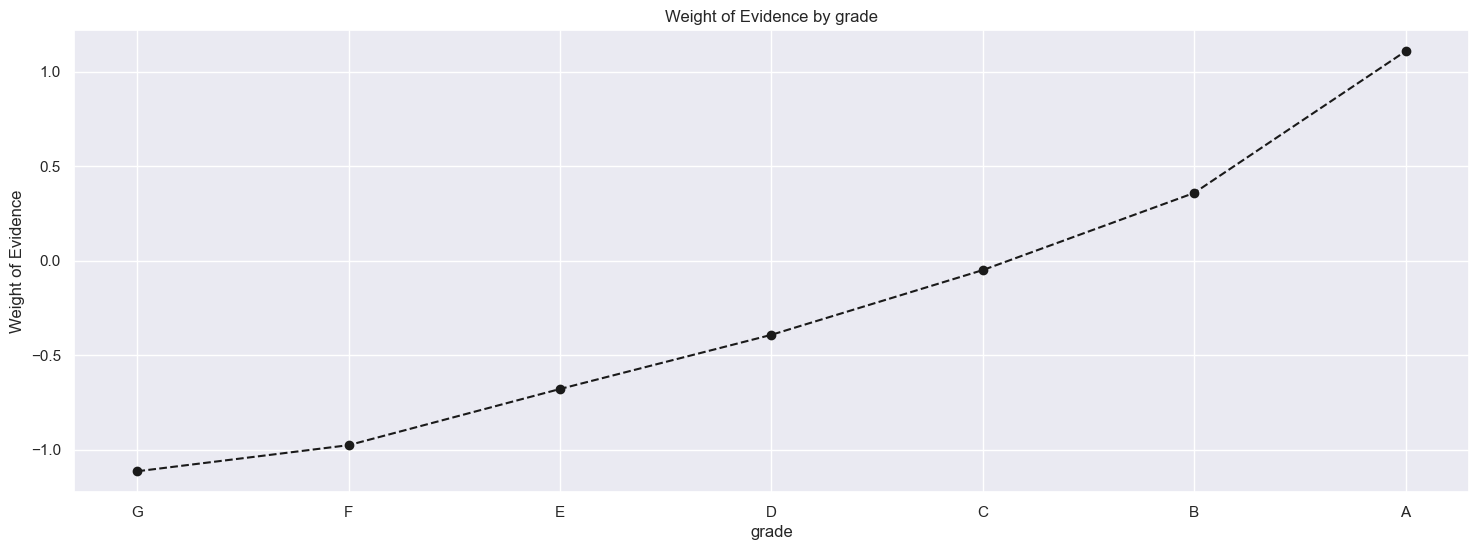

In [96]:
plot_by_woe(df_temp,0)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [98]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

home_ownership   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0          OTHER     137  0.204380    0.000367     28.0     109.0   
1           NONE      40  0.150000    0.000107      6.0      34.0   
2           RENT  150599  0.126130    0.403720  18995.0  131604.0   
3            OWN   33295  0.107464    0.089256   3578.0   29717.0   
4       MORTGAGE  188956  0.096165    0.506546  18171.0  170785.0   
5            ANY       1  0.000000    0.000003      0.0       1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0     0.000328    0.000687 -0.738602            NaN       NaN  inf  
1     0.000102    0.000147 -0.363144       0.054380  0.375458  inf  
2     0.396099    0.465815 -0.162123       0.023870  0.201021  inf  
3     0.089442    0.087743  0.019170       0.018666  0.181294  inf  
4     0.514026    0.445608  0.142834       0.011298  0.123663  inf  
5     0.000003    0.000000       inf       0.096165       inf  inf

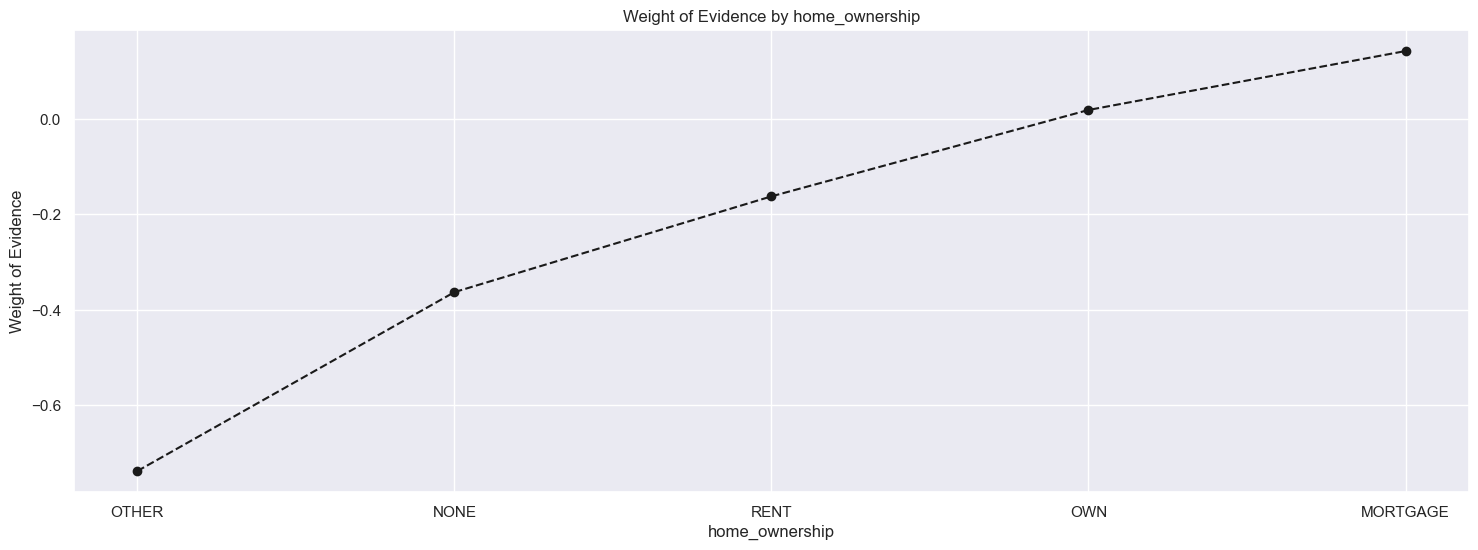

In [99]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [100]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [102]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [103]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

addr_state  n_obs  prop_bad  prop_n_obs   n_bad   n_good  prop_n_good  \
0          NE     13  0.538462    0.000035     7.0      6.0     0.000018   
1          IA     13  0.230769    0.000035     3.0     10.0     0.000030   
2          NV   5221  0.135415    0.013996   707.0   4514.0     0.013586   
3          FL  25211  0.124192    0.067585  3131.0  22080.0     0.066456   
4          HI   2001  0.122939    0.005364   246.0   1755.0     0.005282   
5          AL   4671  0.122672    0.012522   573.0   4098.0     0.012334   
6          NM   2075  0.116627    0.005563   242.0   1833.0     0.005517   
7          VA  11366  0.116136    0.030470  1320.0  10046.0     0.030236   
8          NY  32211  0.116016    0.086350  3737.0  28474.0     0.085701   
9          OK   3284  0.115713    0.008804   380.0   2904.0     0.008740   
10         TN   4845  0.115377    0.012988   559.0   4286.0     0.012900   
11         MO   6017  0.115340    0.016130   694.0   5323.0     0.016021   
12         LA   4359  0.114705    0.011685   500.0   3859.0     0.011615   
13         MD   8771  0.114582    0.023513  1005.0   7766.0     0.023374   
14         NC  10204  0.114367    0.027355  1167.0   9037.0     0.027199   
15         CA  57199  0.114355    0.153337  6541.0  50658.0     0.152470   
16         UT   2756  0.112845    0.007388   311.0   2445.0     0.007359   
17         KY   3587  0.112350    0.009616   403.0   3184.0     0.009583   
18         AZ   8645  0.111741    0.023175   966.0   7679.0     0.023112   
19         NJ  14385  0.111714    0.038563  1607.0  12778.0     0.038459   
20         AR   2760  0.110145    0.007399   304.0   2456.0     0.007392   
21         MI   9191  0.109564    0.024639  1007.0   8184.0     0.024632   
22         PA  13090  0.109549    0.035091  1434.0  11656.0     0.035082   
23         OH  12135  0.109106    0.032531  1324.0  10811.0     0.032539   
24         MN   6526  0.108642    0.017495   709.0   5817.0     0.017508   
25         RI   1647  0.106861    0.004415   176.0   1471.0     0.004427   
26         MA   8858  0.106457    0.023746   943.0   7915.0     0.023822   
27         DE   1064  0.106203    0.002852   113.0    951.0     0.002862   
28         SD    801  0.106117    0.002147    85.0    716.0     0.002155   
29         IN   5210  0.105950    0.013967   552.0   4658.0     0.014020   
30         GA  11960  0.103010    0.032062  1232.0  10728.0     0.032289   
31         WA   8372  0.102843    0.022443   861.0   7511.0     0.022606   
32         OR   4814  0.102410    0.012905   493.0   4321.0     0.013005   
33         WI   4740  0.100211    0.012707   475.0   4265.0     0.012837   
34         MT   1103  0.098821    0.002957   109.0    994.0     0.002992   
35         TX  29158  0.096200    0.078166  2805.0  26353.0     0.079317   
36         IL  14833  0.095126    0.039764  1411.0  13422.0     0.040397   
37         CT   5775  0.094545    0.015481   546.0   5229.0     0.015738   
38         KS   3360  0.091964    0.009007   309.0   3051.0     0.009183   
39         SC   4448  0.090827    0.011924   404.0   4044.0     0.012172   
40         CO   7823  0.090758    0.020972   710.0   7113.0     0.021409   
41         VT    727  0.089409    0.001949    65.0    662.0     0.001992   
42         AK   1003  0.088734    0.002689    89.0    914.0     0.002751   
43         MS    980  0.087755    0.002627    86.0    894.0     0.002691   
44         WV   1926  0.079958    0.005163   154.0   1772.0     0.005333   
45         NH   1830  0.078142    0.004906   143.0   1687.0     0.005078   
46         WY    919  0.071817    0.002464    66.0    853.0     0.002567   
47         DC   1129  0.065545    0.003027    74.0   1055.0     0.003175   
48         ME      2  0.000000    0.000005     0.0      2.0     0.000006   
49         ID     10  0.000000    0.000027     0.0     10.0     0.000030   

    prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0     0.000172 -2.251896            NaN       NaN  inf  
1     0.0000

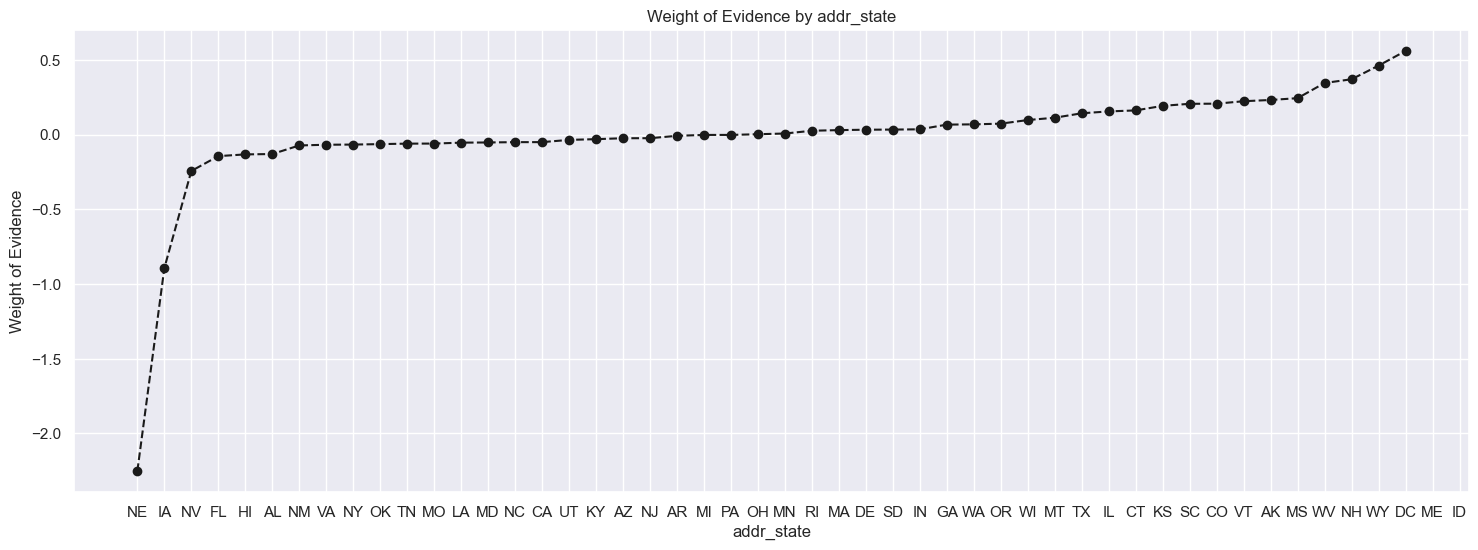

In [104]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [105]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

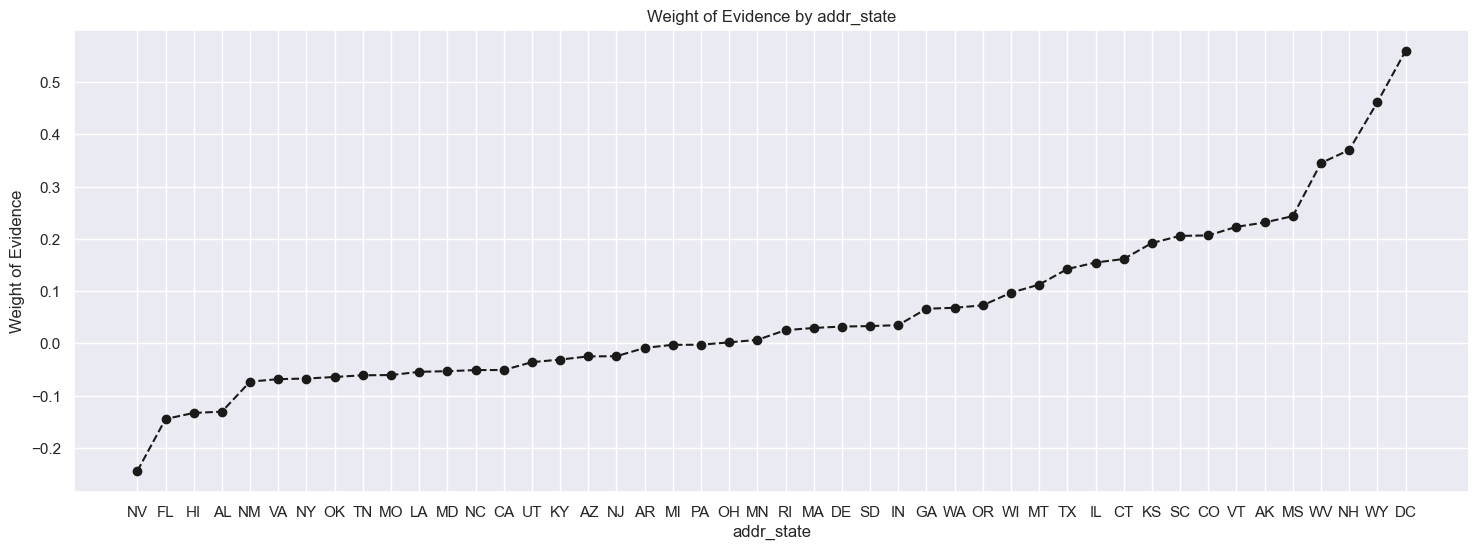

In [106]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

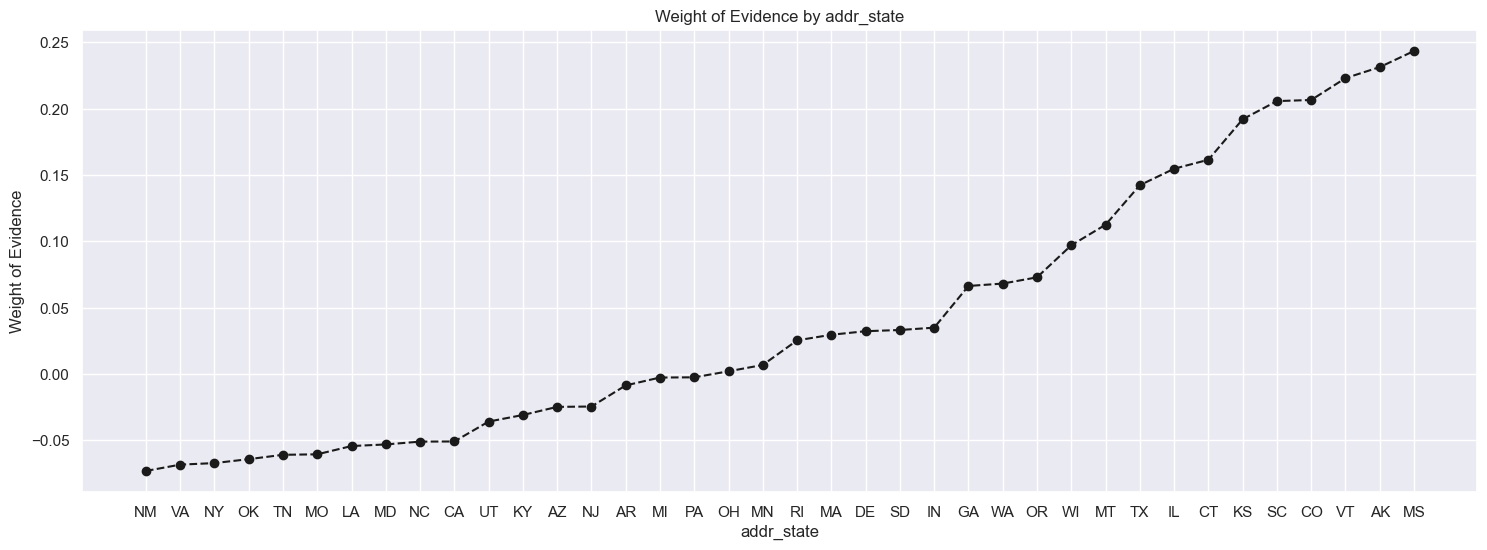

In [107]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [108]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables: Homework

In [110]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0            Verified  134414  0.127219    0.360332  17100.0  117314.0   
1     Source Verified  120030  0.104082    0.321772  12493.0  107537.0   
2        Not Verified  118584  0.094321    0.317896  11185.0  107399.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0     0.353090    0.419344 -0.171969            NaN       NaN  0.020384  
1     0.323663    0.306366  0.054922       0.023137  0.226891  0.020384  
2     0.323248    0.274290  0.164232       0.009761  0.109311  0.020384

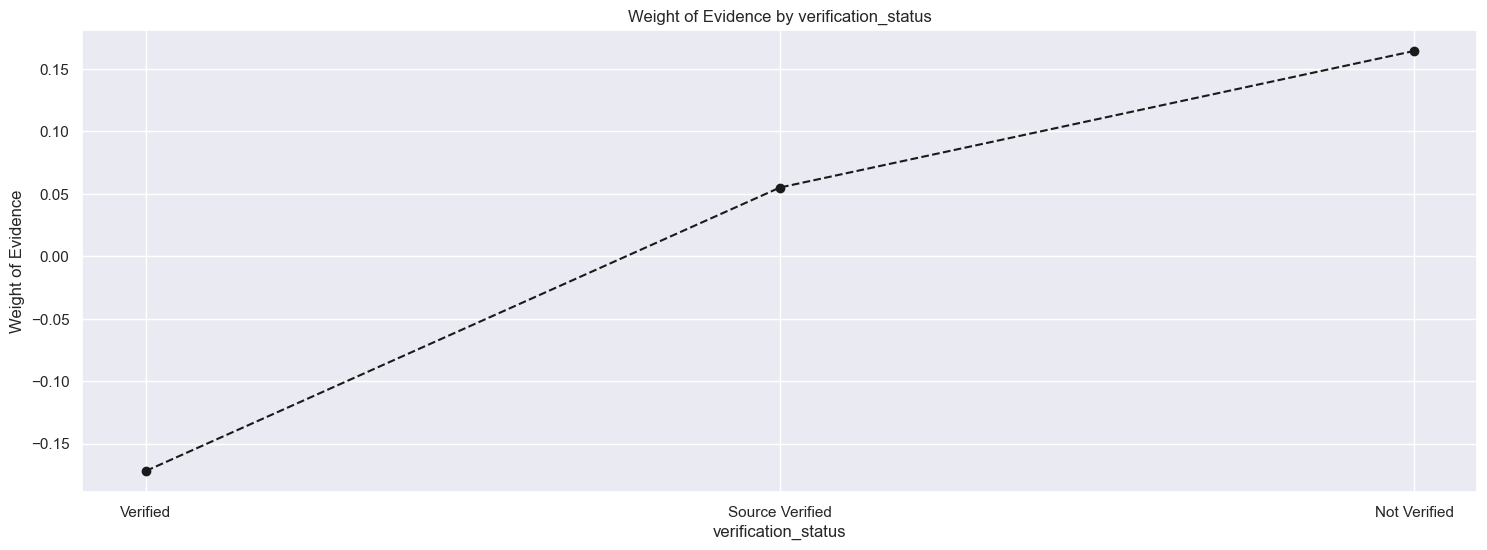

In [111]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [112]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0       small_business    5582  0.213902    0.014964   1194.0    4388.0   
1          educational     333  0.198198    0.000893     66.0     267.0   
2               moving    2392  0.160535    0.006412    384.0    2008.0   
3                house    1830  0.139891    0.004906    256.0    1574.0   
4                other   18884  0.137736    0.050624   2601.0   16283.0   
5     renewable_energy     281  0.135231    0.000753     38.0     243.0   
6              medical    3684  0.131650    0.009876    485.0    3199.0   
7              wedding    1887  0.118177    0.005059    223.0    1664.0   
8             vacation    1991  0.117529    0.005337    234.0    1757.0   
9   debt_consolidation  219183  0.113116    0.587578  24793.0  194390.0   
10    home_improvement   21238  0.099303    0.056934   2109.0   19129.0   
11      major_purchase    7837  0.094551    0.021009    741.0    7096.0   
12                 car    4325  0.090405    0.011594    391.0    3934.0   
13         credit_card   83581  0.086898    0.224061   7263.0   76318.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.013207    0.029280 -0.796180            NaN       NaN  0.035418  
1      0.000804    0.001619 -0.700151       0.015704  0.096029  0.035418  
2      0.006044    0.009417 -0.443493       0.037663  0.256658  0.035418  
3      0.004737    0.006278 -0.281547       0.020644  0.161946  0.035418  
4      0.049008    0.063784 -0.263519       0.002155  0.018028  0.035418  
5      0.000731    0.000932 -0.242270       0.002504  0.021250  0.035418  
6      0.009628    0.011894 -0.211300       0.003581  0.030969  0.035418  
7      0.005008    0.005469 -0.087937       0.013473  0.123363  0.035418  
8      0.005288    0.005738 -0.081703       0.000648  0.006234  0.035418  
9      0.585071    0.607999 -0.038440       0.004413  0.043263  0.035418  
10     0.057574    0.051719  0.107247       0.013812  0.145687  0.035418  
11     0.021357    0.018172  0.161541       0.004752  0.054294  0.035418  
12     0.011840    0.009589  0.210959       0.004147  0.049419  0.035418  
13     0.229701    0.178111  0.254371       0.003507  0.043411  0.035418

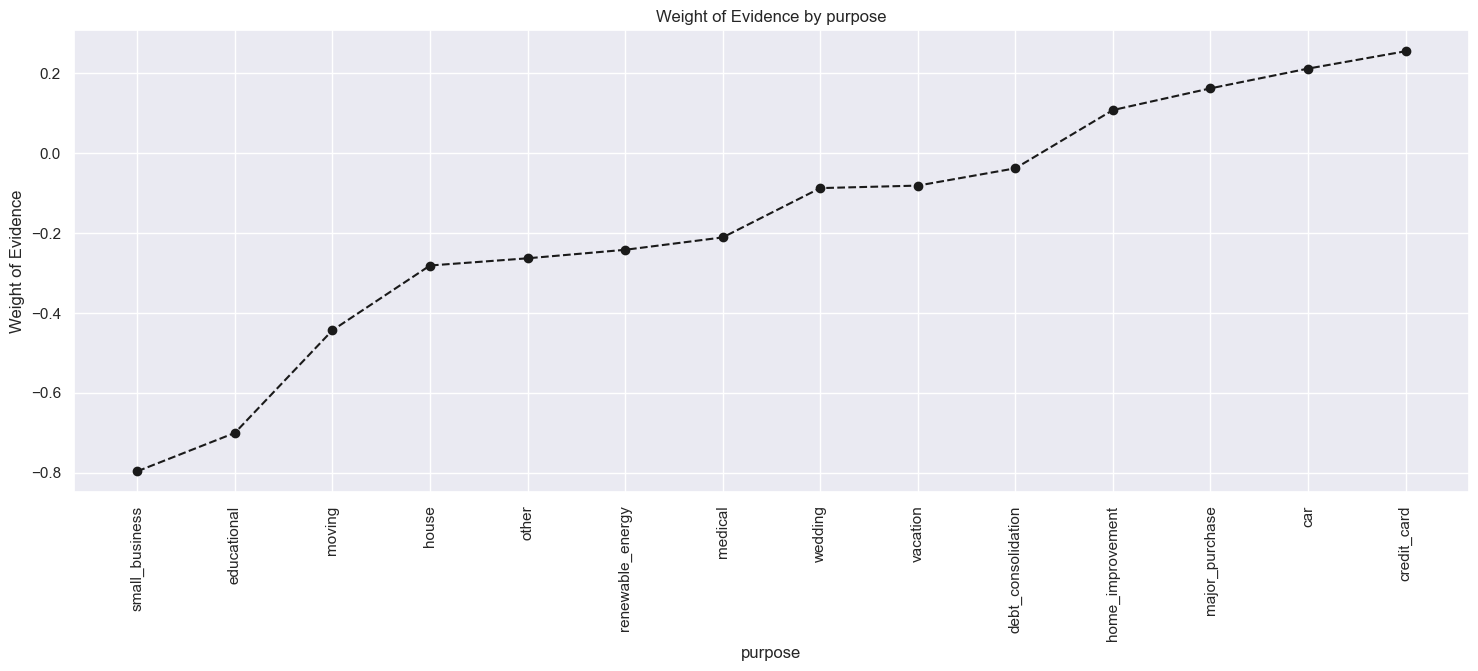

In [113]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [114]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [115]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0                   f  242514  0.120306    0.650123  29176.0  213338.0   
1                   w  130514  0.088895    0.349877  11602.0  118912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE       IV  
0     0.642101    0.715484 -0.108214            NaN       NaN  0.02478  
1     0.357899    0.284516  0.229461       0.031412  0.337675  0.02478

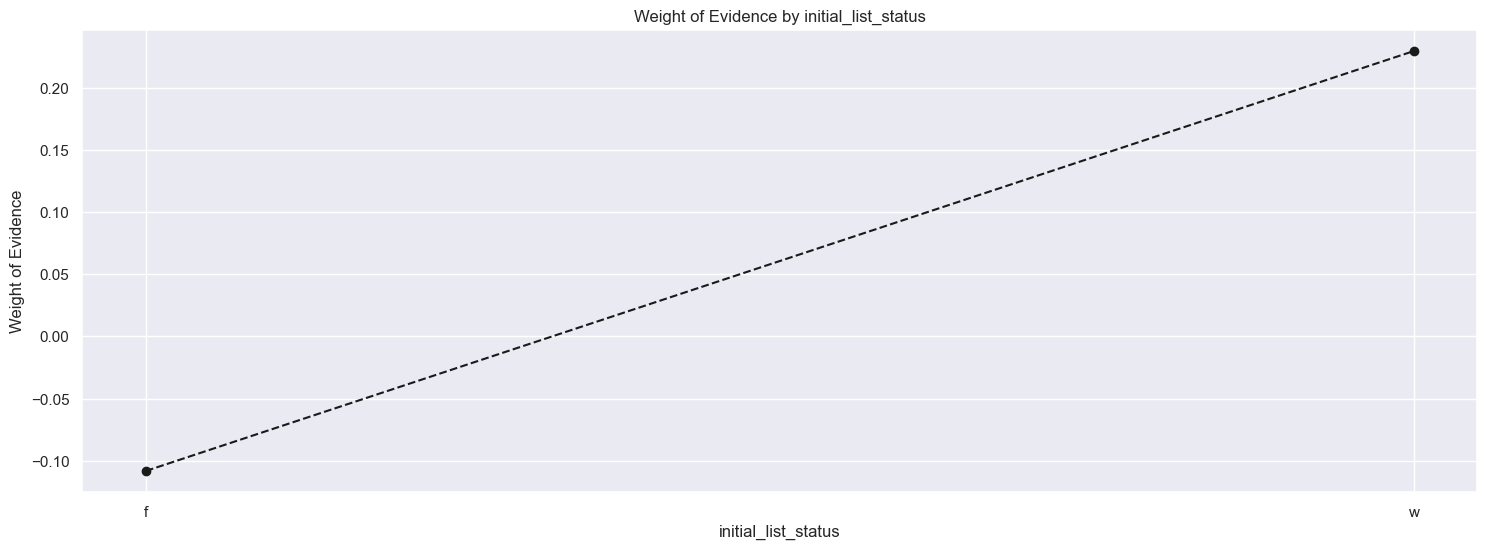

In [116]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [118]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE']) we want the natural order so we won't be doing sorting
    #df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [120]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [121]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_int   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0        36  270419  0.097005    0.724929  26232.0  244187.0      0.73495   
1        60  102609  0.141761    0.275071  14546.0   88063.0      0.26505   

   prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0    0.643288  0.133209            NaN       NaN  0.039434  
1    0.356712 -0.297009       0.044756  0.430218  0.039434

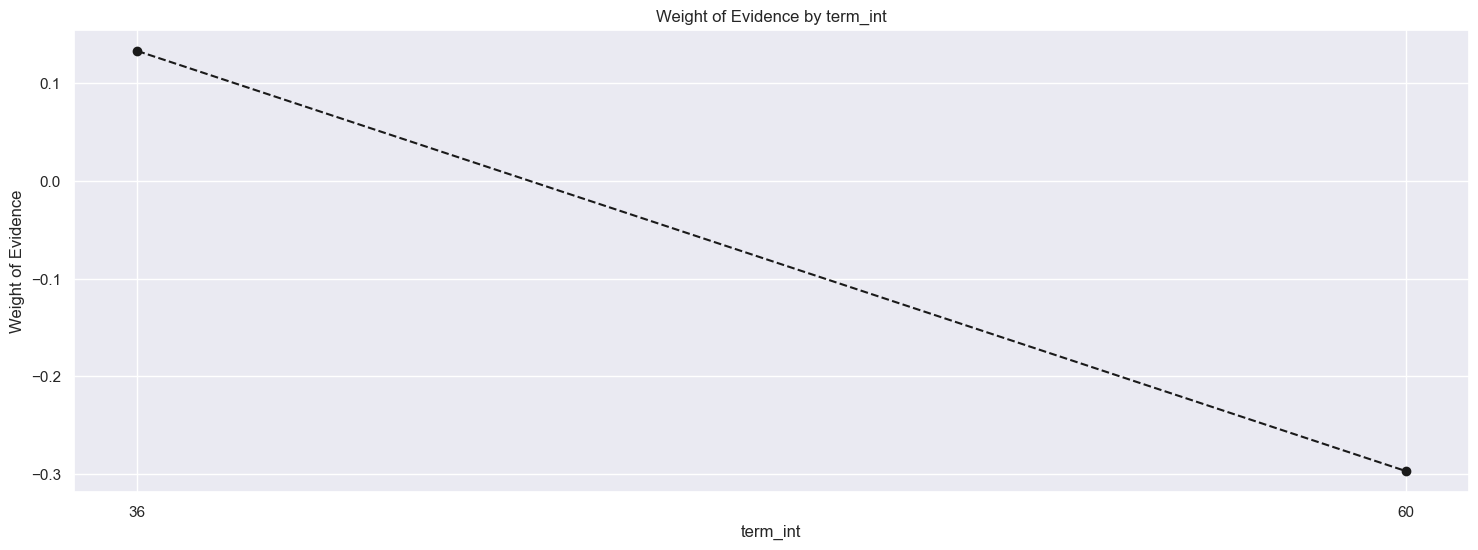

In [122]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [123]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [124]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [125]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0              0.0   45720  0.123600    0.122565   5651.0   40069.0   
1              1.0   23654  0.113004    0.063411   2673.0   20981.0   
2              2.0   33078  0.109045    0.088674   3607.0   29471.0   
3              3.0   29205  0.109228    0.078292   3190.0   26015.0   
4              4.0   22468  0.109356    0.060231   2457.0   20011.0   
5              5.0   24602  0.115275    0.065952   2836.0   21766.0   
6              6.0   20887  0.116101    0.055993   2425.0   18462.0   
7              7.0   21049  0.112547    0.056427   2369.0   18680.0   
8              8.0   17853  0.110122    0.047860   1966.0   15887.0   
9              9.0   14267  0.113338    0.038246   1617.0   12650.0   
10            10.0  120245  0.099688    0.322348  11987.0  108258.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.120599    0.138580 -0.138975            NaN       NaN  0.006506  
1      0.063148    0.065550 -0.037329       0.010596  0.101645  0.006506  
2      0.088701    0.088455  0.002785       0.003959  0.040114  0.006506  
3      0.078299    0.078228  0.000907       0.000183  0.001878  0.006506  
4      0.060229    0.060253 -0.000404       0.000128  0.001311  0.006506  
5      0.065511    0.069547 -0.059790       0.005920  0.059387  0.006506  
6      0.055567    0.059468 -0.067862       0.000826  0.008071  0.006506  
7      0.056223    0.058095 -0.032759       0.003554  0.035102  0.006506  
8      0.047816    0.048212 -0.008245       0.002425  0.024515  0.006506  
9      0.038074    0.039654 -0.040660       0.003217  0.032416  0.006506  
10     0.325833    0.293958  0.102950       0.013650  0.143610  0.006506

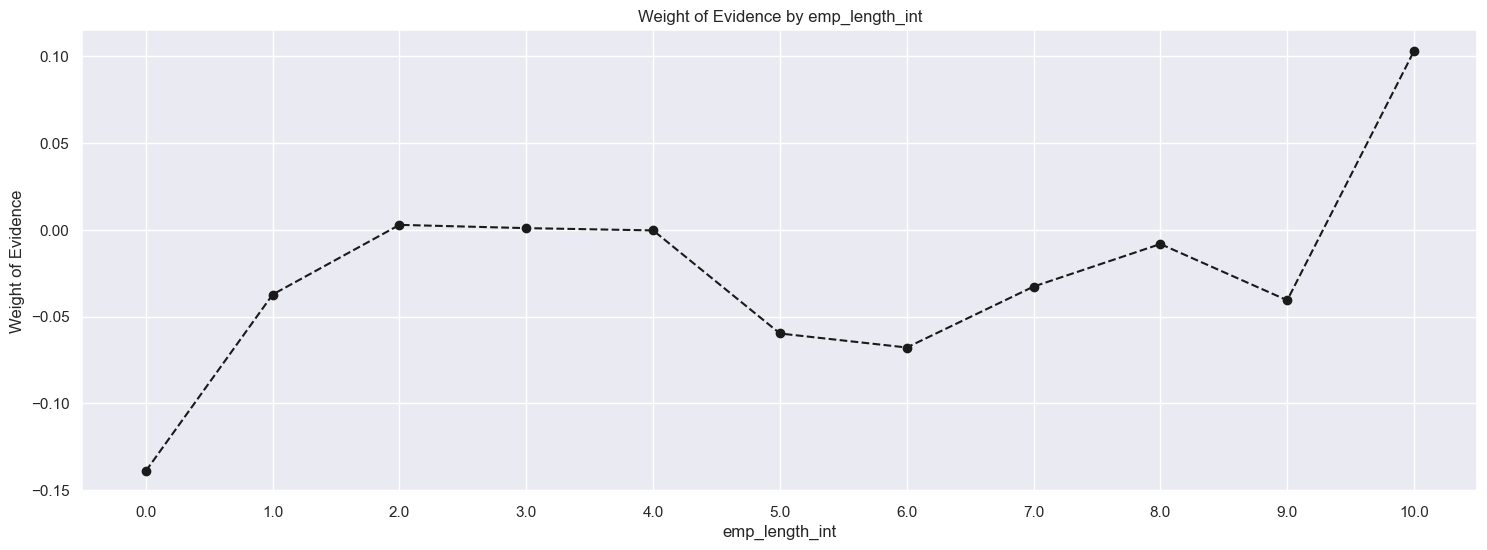

In [126]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [127]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [129]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [130]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [131]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [132]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_issue_d_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0              (35.91, 37.8]  28170  0.057756    0.075517  1627.0  26543.0   
1               (37.8, 39.6]  39636  0.071576    0.106255  2837.0  36799.0   
2               (39.6, 41.4]  38614  0.082716    0.103515  3194.0  35420.0   
3               (41.4, 43.2]  29038  0.091397    0.077844  2654.0  26384.0   
4               (43.2, 45.0]  28367  0.098213    0.076045  2786.0  25581.0   
5               (45.0, 46.8]  12165  0.100699    0.032611  1225.0  10940.0   
6               (46.8, 48.6]  24451  0.101100    0.065547  2472.0  21979.0   
7               (48.6, 50.4]  22969  0.111672    0.061574  2565.0  20404.0   
8               (50.4, 52.2]  20640  0.119477    0.055331  2466.0  18174.0   
9               (52.2, 54.0]  18312  0.133137    0.049090  2438.0  15874.0   
10              (54.0, 55.8]   8286  0.143254    0.022213  1187.0   7099.0   
11              (55.8, 57.6]  14120  0.136969    0.037852  1934.0  12186.0   
12              (57.6, 59.4]  11529  0.140342    0.030907  1618.0   9911.0   
13              (59.4, 61.2]   9974  0.147183    0.026738  1468.0   8506.0   
14              (61.2, 63.0]   9811  0.148099    0.026301  1453.0   8358.0   
15              (63.0, 64.8]   4304  0.155669    0.011538   670.0   3634.0   
16              (64.8, 66.6]   6723  0.175219    0.018023  1178.0   5545.0   
17              (66.6, 68.4]   5334  0.158793    0.014299   847.0   4487.0   
18              (68.4, 70.2]   4377  0.153301    0.011734   671.0   3706.0   
19              (70.2, 72.0]   3868  0.172441    0.010369   667.0   3201.0   
20              (72.0, 73.8]   1785  0.144538    0.004785   258.0   1527.0   
21              (73.8, 75.6]   3395  0.146981    0.009101   499.0   2896.0   
22              (75.6, 77.4]   3055  0.146318    0.008190   447.0   2608.0   
23              (77.4, 79.2]   2849  0.157950    0.007637   450.0   2399.0   
24              (79.2, 81.0]   2412  0.148010    0.006466   357.0   2055.0   
25              (81.0, 82.8]   1044  0.130268    0.002799   136.0    908.0   
26              (82.8, 84.6]   2182  0.129239    0.005849   282.0   1900.0   
27              (84.6, 86.4]   1997  0.145218    0.005353   290.0   1707.0   
28              (86.4, 88.2]   1921  0.166059    0.005150   319.0   1602.0   
29              (88.2, 90.0]   1870  0.157754    0.005013   295.0   1575.0   
30              (90.0, 91.8]    795  0.140881    0.002131   112.0    683.0   
31              (91.8, 93.6]   1373  0.109250    0.003681   150.0   1223.0   
32              (93.6, 95.4]   1087  0.125115    0.002914   136.0    951.0   
33              (95.4, 97.2]   1044  0.117816    0.002799   123.0    921.0   
34              (97.2, 99.0]    877  0.143672    0.002351   126.0    751.0   
35             (99.0, 100.8]    346  0.121387    0.000928    42.0    304.0   
36            (100.8, 102.6]    647  0.136012    0.001734    88.0    559.0   
37            (102.6, 104.4]    542  0.149446    0.001453    81.0    461.0   
38            (104.4, 106.2]    497  0.130785    0.001332    65.0    432.0   
39            (106.2, 108.0]    403  0.146402    0.001080    59.0    344.0   
40            (108.0, 109.8]    173  0.196532    0.000464    34.0    139.0   
41            (109.8, 111.6]    139  0.165468    0.000373    23.0    116.0   
42            (111.6, 113.4]    204  0.200980    0.000547    41.0    163.0   
43            (113.4, 115.2]    182  0.203297    0.000488    37.0    145.0   
44            (115.2, 117.0]    530  0.237736    0.001421   126.0    404.0   
45            (117.0, 118.8]    247  0.202429    0.000662    50.0    197.0   
46            (118.8, 120.6]    394  0.276650    0.001056   109.0    285.0   
47            (120.6, 122.4]    176  0.295455    0.000472    52.0    124.0   
48            (122.4, 124.2]    104  0.250000    0.000279    26.0     78.0   
49            (124.2, 126.0]     70  0.114286    0.000188     8.0     62.0   

    prop_n_good  prop_n_

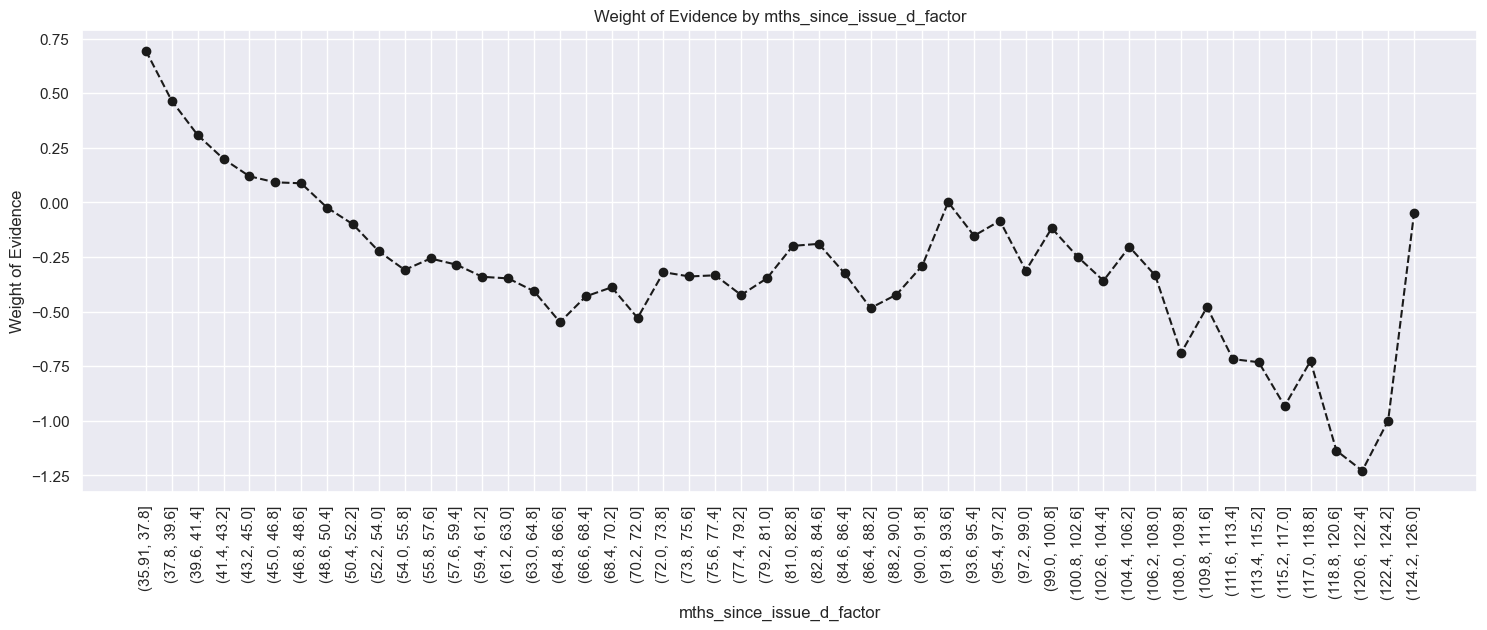

In [133]:
plot_by_woe(df_temp,90)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

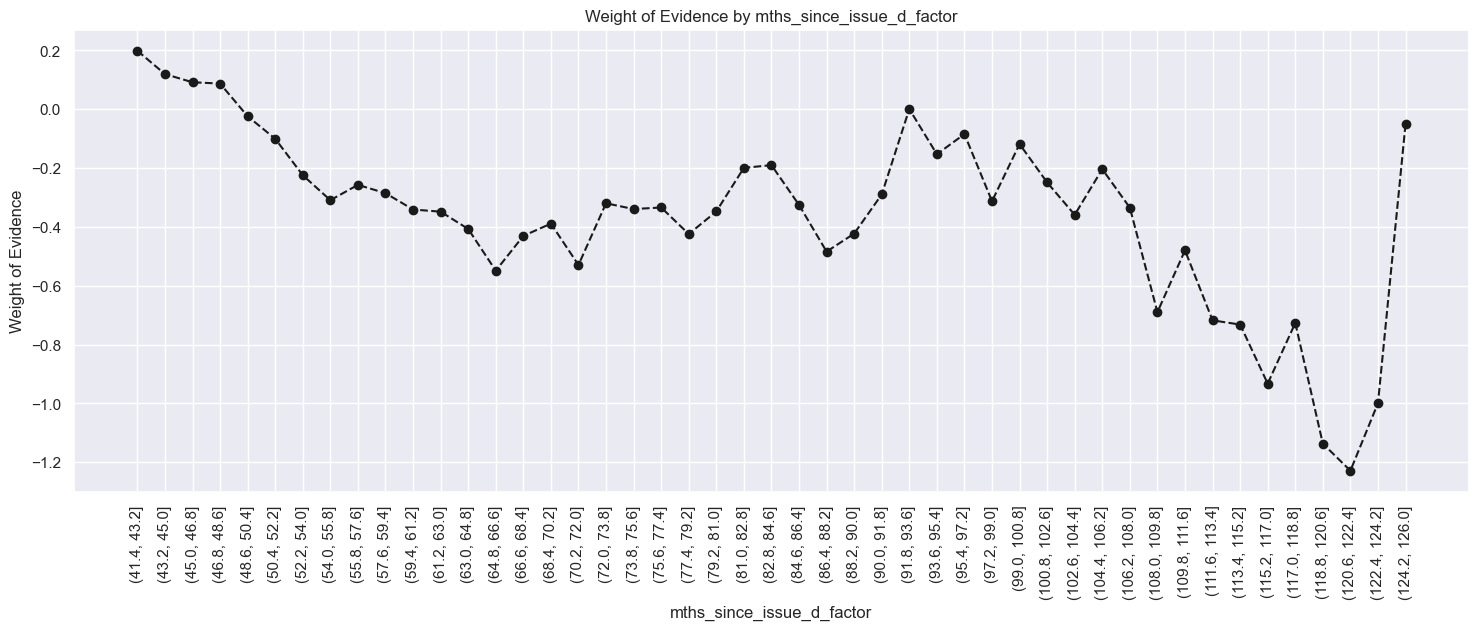

In [134]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [135]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'] < 38, 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 84)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'] > 84, 1, 0)

In [136]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [137]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


int_rate_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0     (5.399, 5.833]    785  0.038217    0.002104    30.0    755.0   
1     (5.833, 6.246]   8459  0.019624    0.022677   166.0   8293.0   
2     (6.246, 6.658]   7826  0.028495    0.020980   223.0   7603.0   
3     (6.658, 7.071]   1816  0.026982    0.004868    49.0   1767.0   
4     (7.071, 7.484]   3143  0.023544    0.008426    74.0   3069.0   
5     (7.484, 7.897]  12581  0.037676    0.033727   474.0  12107.0   
6      (7.897, 8.31]   9687  0.050686    0.025969   491.0   9196.0   
7      (8.31, 8.722]   6594  0.034729    0.017677   229.0   6365.0   
8     (8.722, 9.135]   9539  0.062585    0.025572   597.0   8942.0   
9     (9.135, 9.548]   6681  0.036072    0.017910   241.0   6440.0   
10    (9.548, 9.961]   7588  0.068134    0.020342   517.0   7071.0   
11   (9.961, 10.374]  10941  0.066356    0.029330   726.0  10215.0   
12  (10.374, 10.786]   5857  0.086392    0.015701   506.0   5351.0   
13  (10.786, 11.199]  17851  0.070416    0.047854  1257.0  16594.0   
14  (11.199, 11.612]   4876  0.081214    0.013071   396.0   4480.0   
15  (11.612, 12.025]  15597  0.066872    0.041812  1043.0  14554.0   
16  (12.025, 12.438]  12336  0.107490    0.033070  1326.0  11010.0   
17   (12.438, 12.85]  11065  0.077090    0.029663   853.0  10212.0   
18   (12.85, 13.263]  21329  0.097051    0.057178  2070.0  19259.0   
19  (13.263, 13.676]  15392  0.092256    0.041262  1420.0  13972.0   
20  (13.676, 14.089]  10991  0.103175    0.029464  1134.0   9857.0   
21  (14.089, 14.502]  23436  0.112306    0.062826  2632.0  20804.0   
22  (14.502, 14.914]   4333  0.137087    0.011616   594.0   3739.0   
23  (14.914, 15.327]  18932  0.118160    0.050752  2237.0  16695.0   
24   (15.327, 15.74]  12327  0.112517    0.033046  1387.0  10940.0   
25   (15.74, 16.153]   7477  0.161027    0.020044  1204.0   6273.0   
26  (16.153, 16.566]  12991  0.140482    0.034826  1825.0  11166.0   
27  (16.566, 16.978]   4237  0.157423    0.011358   667.0   3570.0   
28  (16.978, 17.391]  11396  0.146455    0.030550  1669.0   9727.0   
29  (17.391, 17.804]  12288  0.160563    0.032941  1973.0  10315.0   
30  (17.804, 18.217]   1306  0.176876    0.003501   231.0   1075.0   
31   (18.217, 18.63]  11036  0.164552    0.029585  1816.0   9220.0   
32   (18.63, 19.042]   6808  0.180964    0.018251  1232.0   5576.0   
33  (19.042, 19.455]   4425  0.196836    0.011862   871.0   3554.0   
34  (19.455, 19.868]   6763  0.176401    0.018130  1193.0   5570.0   
35  (19.868, 20.281]   4899  0.167789    0.013133   822.0   4077.0   
36  (20.281, 20.694]   3221  0.204905    0.008635   660.0   2561.0   
37  (20.694, 21.106]   4016  0.200448    0.010766   805.0   3211.0   
38  (21.106, 21.519]   2729  0.220227    0.007316   601.0   2128.0   
39  (21.519, 21.932]    989  0.239636    0.002651   237.0    752.0   
40  (21.932, 22.345]   3476  0.204833    0.009318   712.0   2764.0   
41  (22.345, 22.758]   2251  0.236339    0.006034   532.0   1719.0   
42   (22.758, 23.17]   1535  0.240391    0.004115   369.0   1166.0   
43   (23.17, 23.583]   2652  0.217195    0.007109   576.0   2076.0   
44  (23.583, 23.996]   1573  0.275906    0.004217   434.0   1139.0   
45  (23.996, 24.409]   1455  0.232302    0.003901   338.0   1117.0   
46  (24.409, 24.822]   1664  0.237380    0.004461   395.0   1269.0   
47  (24.822, 25.234]   1315  0.228897    0.003525   301.0   1014.0   
48  (25.234, 25.647]    778  0.263496    0.002086   205.0    573.0   
49   (25.647, 26.06]   1786  0.245241    0.004788   438.0   1348.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.002272    0.000736  1.127775            NaN       NaN  0.343349  
1      0.024960    0.004071  1.813434       0.018592  0.685659  0.343349  
2      0.022883    0.005469  1.431381       0.008871  0.382053  0.343349  
3      0.005318    0.001202  1.487473       0.001512  0.056092  0.343349  
4      0.009237    0.001815  1.627297       0.003438  0.139

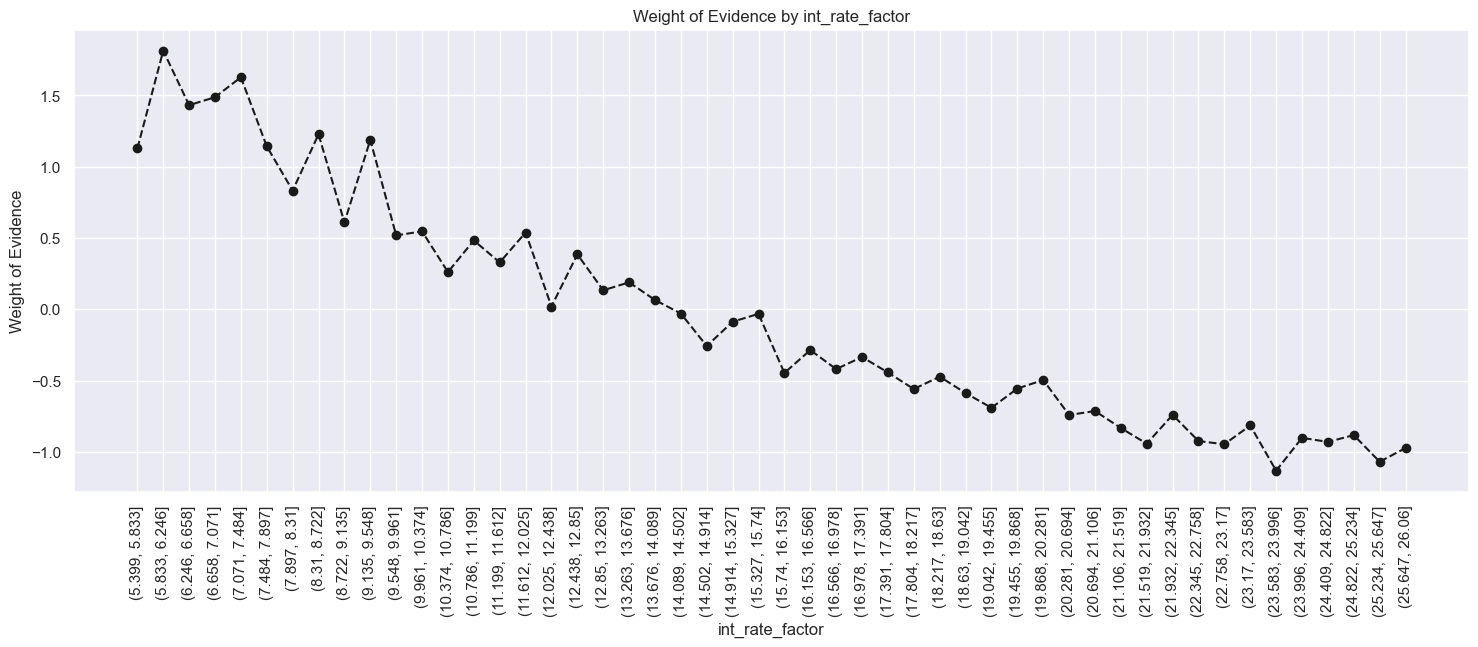

In [138]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [139]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [140]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [141]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


funded_amnt_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0      (465.5, 1190.0]   1224  0.094771    0.003281   116.0   1108.0   
1     (1190.0, 1880.0]   3028  0.096103    0.008117   291.0   2737.0   
2     (1880.0, 2570.0]   6018  0.106181    0.016133   639.0   5379.0   
3     (2570.0, 3260.0]   7248  0.110927    0.019430   804.0   6444.0   
4     (3260.0, 3950.0]   4751  0.108398    0.012736   515.0   4236.0   
5     (3950.0, 4640.0]   9023  0.109055    0.024189   984.0   8039.0   
6     (4640.0, 5330.0]  15903  0.107841    0.042632  1715.0  14188.0   
7     (5330.0, 6020.0]  17236  0.093931    0.046206  1619.0  15617.0   
8     (6020.0, 6710.0]   6914  0.112381    0.018535   777.0   6137.0   
9     (6710.0, 7400.0]  11806  0.101982    0.031649  1204.0  10602.0   
10    (7400.0, 8090.0]  17692  0.102645    0.047428  1816.0  15876.0   
11    (8090.0, 8780.0]   6316  0.120488    0.016932   761.0   5555.0   
12    (8780.0, 9470.0]   9168  0.119655    0.024577  1097.0   8071.0   
13   (9470.0, 10160.0]  33410  0.104999    0.089564  3508.0  29902.0   
14  (10160.0, 10850.0]   6755  0.127165    0.018109   859.0   5896.0   
15  (10850.0, 11540.0]   8559  0.117303    0.022945  1004.0   7555.0   
16  (11540.0, 12230.0]  23506  0.097507    0.063014  2292.0  21214.0   
17  (12230.0, 12920.0]   4802  0.124948    0.012873   600.0   4202.0   
18  (12920.0, 13610.0]   7247  0.105147    0.019427   762.0   6485.0   
19  (13610.0, 14300.0]   8123  0.107226    0.021776   871.0   7252.0   
20  (14300.0, 14990.0]   5183  0.125024    0.013894   648.0   4535.0   
21  (14990.0, 15680.0]  21757  0.100703    0.058325  2191.0  19566.0   
22  (15680.0, 16370.0]  11788  0.115881    0.031601  1366.0  10422.0   
23  (16370.0, 17060.0]   6538  0.123279    0.017527   806.0   5732.0   
24  (17060.0, 17750.0]   3422  0.133255    0.009174   456.0   2966.0   
25  (17750.0, 18440.0]  11441  0.114938    0.030671  1315.0  10126.0   
26  (18440.0, 19130.0]   3919  0.130901    0.010506   513.0   3406.0   
27  (19130.0, 19820.0]   4004  0.142607    0.010734   571.0   3433.0   
28  (19820.0, 20510.0]  20287  0.101001    0.054385  2049.0  18238.0   
29  (20510.0, 21200.0]   6712  0.103695    0.017993   696.0   6016.0   
30  (21200.0, 21890.0]   2081  0.148486    0.005579   309.0   1772.0   
31  (21890.0, 22580.0]   4114  0.110355    0.011029   454.0   3660.0   
32  (22580.0, 23270.0]   2445  0.114928    0.006554   281.0   2164.0   
33  (23270.0, 23960.0]   1825  0.155068    0.004892   283.0   1542.0   
34  (23960.0, 24650.0]   9836  0.095669    0.026368   941.0   8895.0   
35  (24650.0, 25340.0]  10074  0.110185    0.027006  1110.0   8964.0   
36  (25340.0, 26030.0]   1832  0.131550    0.004911   241.0   1591.0   
37  (26030.0, 26720.0]   1252  0.164537    0.003356   206.0   1046.0   
38  (26720.0, 27410.0]   1510  0.126490    0.004048   191.0   1319.0   
39  (27410.0, 28100.0]   6457  0.092922    0.017310   600.0   5857.0   
40  (28100.0, 28790.0]    795  0.145912    0.002131   116.0    679.0   
41  (28790.0, 29480.0]   1176  0.133503    0.003153   157.0   1019.0   
42  (29480.0, 30170.0]   7308  0.115353    0.019591   843.0   6465.0   
43  (30170.0, 30860.0]    567  0.174603    0.001520    99.0    468.0   
44  (30860.0, 31550.0]    884  0.116516    0.002370   103.0    781.0   
45  (31550.0, 32240.0]   1326  0.127451    0.003555   169.0   1157.0   
46  (32240.0, 32930.0]    631  0.125198    0.001692    79.0    552.0   
47  (32930.0, 33620.0]   1090  0.104587    0.002922   114.0    976.0   
48  (33620.0, 34310.0]    492  0.109756    0.001319    54.0    438.0   
49  (34310.0, 35000.0]  13553  0.116801    0.036332  1583.0  11970.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.003335    0.002845  0.158977            NaN       NaN  0.014139  
1      0.008238    0.007136  0.143549       0.001332  0.015427  0.014139  
2      0.016190    0.015670  0.032608       0.010078  0.110941  0.014139  
3      0.019395    0.019717 -0.

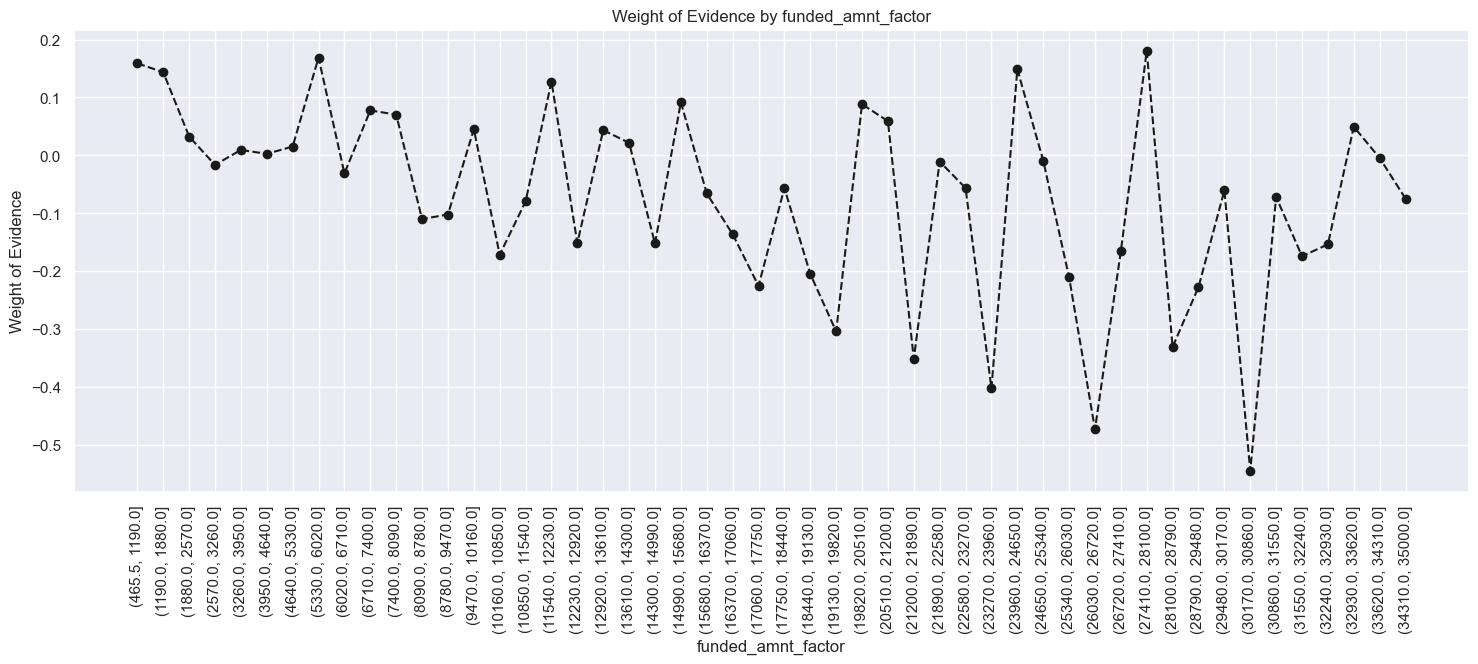

In [142]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [144]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_earliest_cr_line_factor  n_obs  prop_bad  prop_n_obs   n_bad  \
0                     (-0.887, 17.74]     24  0.125000    0.000064     3.0   
1                      (17.74, 35.48]      0       NaN    0.000000     NaN   
2                      (35.48, 53.22]      0       NaN    0.000000     NaN   
3                      (53.22, 70.96]      0       NaN    0.000000     NaN   
4                       (70.96, 88.7]   1815  0.101377    0.004866   184.0   
5                      (88.7, 106.44]   3873  0.138394    0.010383   536.0   
6                    (106.44, 124.18]  10048  0.132265    0.026936  1329.0   
7                    (124.18, 141.92]  16745  0.134130    0.044889  2246.0   
8                    (141.92, 159.66]  21889  0.122801    0.058679  2688.0   
9                     (159.66, 177.4]  27877  0.117552    0.074732  3277.0   
10                    (177.4, 195.14]  35548  0.114381    0.095296  4066.0   
11                   (195.14, 212.88]  39828  0.115195    0.106769  4588.0   
12                   (212.88, 230.62]  39307  0.113364    0.105373  4456.0   
13                   (230.62, 248.36]  29966  0.109357    0.080332  3277.0   
14                    (248.36, 266.1]  27562  0.106415    0.073887  2933.0   
15                    (266.1, 283.84]  23062  0.097997    0.061824  2260.0   
16                   (283.84, 301.58]  19063  0.097047    0.051103  1850.0   
17                   (301.58, 319.32]  12615  0.094253    0.033818  1189.0   
18                   (319.32, 337.06]  12911  0.095423    0.034611  1232.0   
19                    (337.06, 354.8]  10368  0.095968    0.027794   995.0   
20                    (354.8, 372.54]   8587  0.089088    0.023020   765.0   
21                   (372.54, 390.28]   6994  0.090506    0.018749   633.0   
22                   (390.28, 408.02]   6043  0.092835    0.016200   561.0   
23                   (408.02, 425.76]   4316  0.090593    0.011570   391.0   
24                    (425.76, 443.5]   3025  0.082645    0.008109   250.0   
25                    (443.5, 461.24]   2467  0.089988    0.006613   222.0   
26                   (461.24, 478.98]   2248  0.088523    0.006026   199.0   
27                   (478.98, 496.72]   1880  0.090957    0.005040   171.0   
28                   (496.72, 514.46]   1235  0.084211    0.003311   104.0   
29                    (514.46, 532.2]    986  0.089249    0.002643    88.0   
30                    (532.2, 549.94]    741  0.085020    0.001986    63.0   
31                   (549.94, 567.68]    534  0.106742    0.001432    57.0   
32                   (567.68, 585.42]    484  0.086777    0.001297    42.0   
33                   (585.42, 603.16]    329  0.121581    0.000882    40.0   
34                    (603.16, 620.9]    221  0.122172    0.000592    27.0   
35                    (620.9, 638.64]    168  0.130952    0.000450    22.0   
36                   (638.64, 656.38]     98  0.163265    0.000263    16.0   
37                   (656.38, 674.12]     67  0.074627    0.000180     5.0   
38                   (674.12, 691.86]     35  0.142857    0.000094     5.0   
39                    (691.86, 709.6]     28  0.071429    0.000075     2.0   
40                    (709.6, 727.34]     10  0.100000    0.000027     1.0   
41                   (727.34, 745.08]      9  0.333333    0.000024     3.0   
42                   (745.08, 762.82]      7  0.285714    0.000019     2.0   
43                   (762.82, 780.56]      4  0.000000    0.000011     0.0   
44                    (780.56, 798.3]      1  0.000000    0.000003     0.0   
45                    (798.3, 816.04]      5  0.000000    0.000013     0.0   
46                   (816.04, 833.78]      1  0.000000    0.000003     0.0   
47                   (833.78, 851.52]      1  0.000000    0.000003     0.0   
48                   (851.52, 869.26]      2  0.000000    0.000005     0.0   
49                    (869.26, 887.0]      1  0.000000    0.000003     0.0   

     n_good  prop_n_good

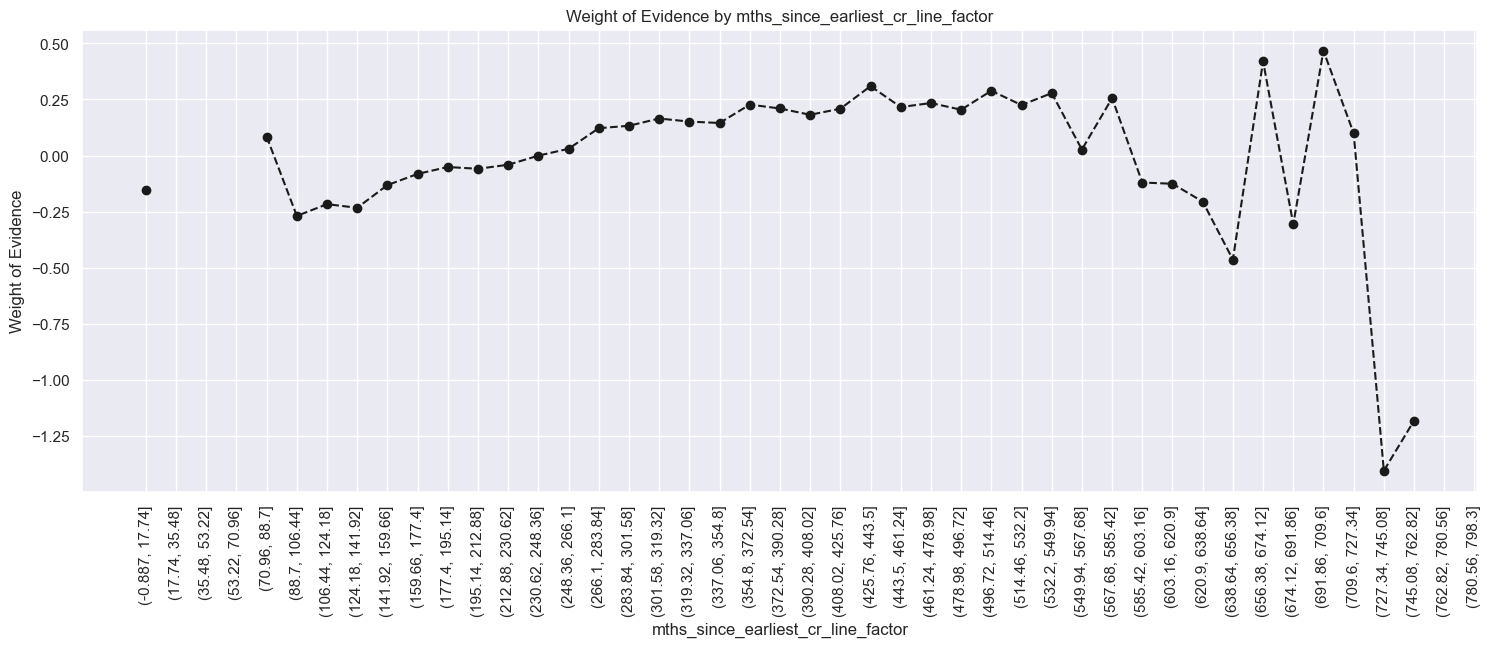

In [145]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

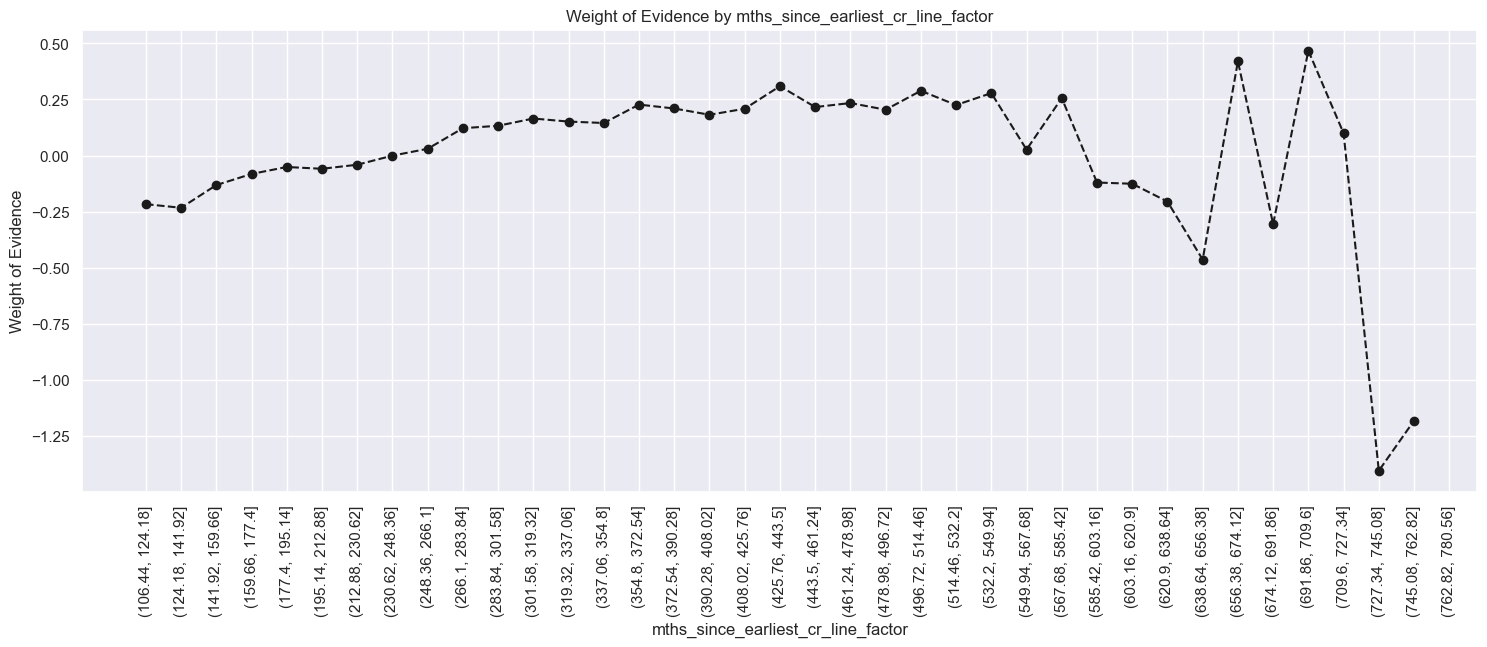

In [146]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [147]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [148]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0           0.0  306417  0.109501    0.821432  33553.0  272864.0     0.821261   
1           1.0   44927  0.106751    0.120439   4796.0   40131.0     0.120786   
2           2.0   13118  0.110993    0.035166   1456.0   11662.0     0.035100   
3           3.0    4550  0.116703    0.012197    531.0    4019.0     0.012096   
4           4.0    1868  0.101178    0.005008    189.0    1679.0     0.005053   
5           5.0     966  0.118012    0.002590    114.0     852.0     0.002564   
6           6.0     501  0.097804    0.001343     49.0     452.0     0.001360   
7           7.0     279  0.139785    0.000748     39.0     240.0     0.000722   
8           8.0     148  0.094595    0.000397     14.0     134.0     0.000403   
9           9.0      89  0.112360    0.000239     10.0      79.0     0.000238   
10         10.0      56  0.142857    0.000150      8.0      48.0     0.000144   
11         11.0      31  0.096774    0.000083      3.0      28.0     0.000084   
12         12.0      30  0.266667    0.000080      8.0      22.0     0.000066   
13         13.0      18  0.166667    0.000048      3.0      15.0     0.000045   
14         14.0       6  0.166667    0.000016      1.0       5.0     0.000015   
15         15.0       6  0.166667    0.000016      1.0       5.0     0.000015   
16         16.0       4  0.000000    0.000011      0.0       4.0     0.000012   
17         17.0       3  0.333333    0.000008      1.0       2.0     0.000006   
18         18.0       3  0.333333    0.000008      1.0       2.0     0.000006   
19         19.0       2  0.000000    0.000005      0.0       2.0     0.000006   
20         21.0       2  0.500000    0.000005      1.0       1.0     0.000003   
21         22.0       2  0.000000    0.000005      0.0       2.0     0.000006   
22         24.0       1  0.000000    0.000003      0.0       1.0     0.000003   
23         29.0       1  0.000000    0.000003      0.0       1.0     0.000003   

    prop_n_bad       WoE  diff_prop_bad      diff_WoE   IV  
0     0.822821 -0.001898            NaN           NaN  inf  
1     0.117612  0.026622       0.002750  2.851964e-02  inf  
2     0.035706 -0.017102       0.004242  4.372412e-02  inf  
3     0.013022 -0.073719       0.005711  5.661637e-02  inf  
4     0.004635  0.086462       0.015526  1.601803e-01  inf  
5     0.002796 -0.086357       0.016835  1.728186e-01  inf  
6     0.001202  0.124117       0.020208  2.104738e-01  inf  
7     0.000956 -0.280668       0.041981  4.047846e-01  inf  
8     0.000343  0.161037       0.045190  4.417052e-01  inf  
9     0.000245 -0.030882       0.017765  1.919197e-01  inf  
10    0.000196 -0.305986       0.030498  2.751033e-01  inf  
11    0.000074  0.135847       0.046083  4.418328e-01  inf  
12    0.000196 -1.086144       0.169892  1.221991e+00  inf  
13    0.000074 -0.488307       0.100000  5.978370e-01  inf  
14    0.000025 -0.488307       0.000000  2.220446e-16  inf  
15    0.000025 -0.488307       0.000000  0.000000e+00  inf  
16    0.000000       inf       0.166667           inf  inf  
17    0.000025 -1.404598       0.333333           inf  inf  
18    0.000025 -1.404598       0.000000  0.000000e+00  inf  
19    0.000000       inf       0.333333           inf  inf  
20    0.000025 -2.097745       0.500000           inf  inf  
21    0.000000       inf       0.500000           inf  inf  
22    0.000000       inf       0.000000           NaN  inf  
23    0.000000       inf       0.000000           NaN  inf

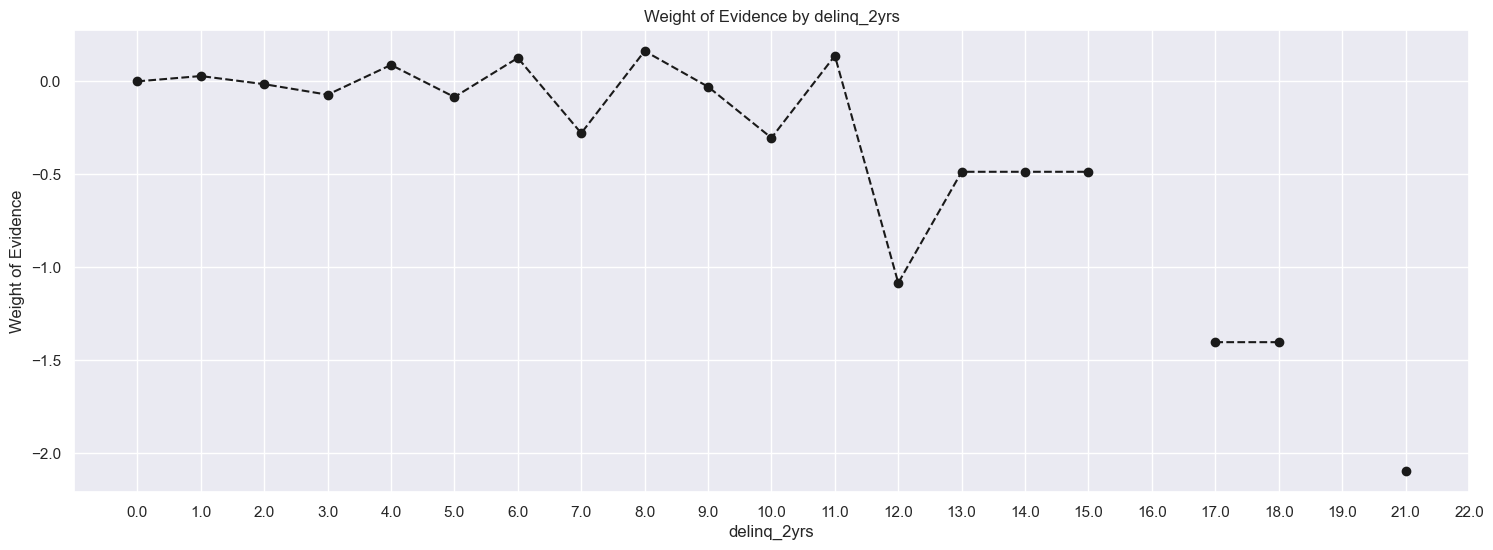

In [149]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [150]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3), 1, 0)

In [151]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0              0.0  193232  0.091605    0.518009  17701.0  175531.0   
1              1.0  104163  0.115050    0.279236  11984.0   92179.0   
2              2.0   46214  0.135803    0.123889   6276.0   39938.0   
3              3.0   20040  0.160329    0.053723   3213.0   16827.0   
4              4.0    5810  0.151635    0.015575    881.0    4929.0   
5              5.0    2217  0.175011    0.005943    388.0    1829.0   
6              6.0     977  0.211873    0.002619    207.0     770.0   
7              7.0     159  0.320755    0.000426     51.0     108.0   
8              8.0     101  0.356436    0.000271     36.0      65.0   
9              9.0      43  0.325581    0.000115     14.0      29.0   
10            10.0      17  0.117647    0.000046      2.0      15.0   
11            11.0       8  0.375000    0.000021      3.0       5.0   
12            12.0      12  0.500000    0.000032      6.0       6.0   
13            13.0       5  0.200000    0.000013      1.0       4.0   
14            14.0       5  0.800000    0.000013      4.0       1.0   
15            15.0       9  0.555556    0.000024      5.0       4.0   
16            16.0       3  0.000000    0.000008      0.0       3.0   
17            17.0       2  0.500000    0.000005      1.0       1.0   
18            18.0       2  0.500000    0.000005      1.0       1.0   
19            19.0       1  0.000000    0.000003      0.0       1.0   
20            20.0       1  1.000000    0.000003      1.0       0.0   
21            24.0       1  0.000000    0.000003      0.0       1.0   
22            25.0       1  1.000000    0.000003      1.0       0.0   
23            27.0       1  0.000000    0.000003      0.0       1.0   
24            28.0       1  0.000000    0.000003      0.0       1.0   
25            31.0       1  0.000000    0.000003      0.0       1.0   
26            32.0       1  1.000000    0.000003      1.0       0.0   
27            33.0       1  1.000000    0.000003      1.0       0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0      0.528310    0.434082  0.196450            NaN       NaN  inf  
1      0.277439    0.293884 -0.057585       0.023446  0.254035  inf  
2      0.120205    0.153907 -0.247150       0.020753  0.189564  inf  
3      0.050646    0.078792 -0.441965       0.024526  0.194816  inf  
4      0.014835    0.021605 -0.375911       0.008694  0.066054  inf  
5      0.005505    0.009515 -0.547226       0.023376  0.171314  inf  
6      0.002318    0.005076 -0.784073       0.036862  0.236848  inf  
7      0.000325    0.001251 -1.347439       0.108882  0.563366  inf  
8      0.000196    0.000883 -1.506877       0.035681  0.159437  inf  
9      0.000087    0.000343 -1.369506       0.030854  0.137370  inf  
10     0.000045    0.000049 -0.082842       0.207934  1.286665  inf  
11     0.000015    0.000074 -1.586919       0.257353  1.504077  inf  
12     0.000018    0.000147 -2.097745       0.125000  0.510826  inf  
13     0.000012    0.000025 -0.711451       0.300000  1.386294  inf  
14     0.000003    0.000098 -3.484039       0.600000  2.772589  inf  
15     0.000012    0.000123 -2.320889       0.244444  1.163151  inf  
16     0.000009    0.000000       inf       0.555556       inf  inf  
17     0.000003    0.000025 -2.097745       0.500000       inf  inf  
18     0.000003    0.000025 -2.097745       0.000000  0.000000  inf  
19     0.000003    0.000000       inf       0.500000       inf  inf  
20     0.000000    0.000025      -inf       1.000000       inf  inf  
21     0.000003    0.000000       inf       1.000000       inf  inf  
22     0.000000    0.000025      -inf       1.000000       inf  inf  
23     0.000003    0.000000       inf       1.000000       inf  inf  
24     0.000003    0.000000       inf       0.000000       NaN  inf  
25     0.000003    0.000000       inf       0.000000       NaN  inf  
26     0.000000    0.000025      -inf       1.000000  

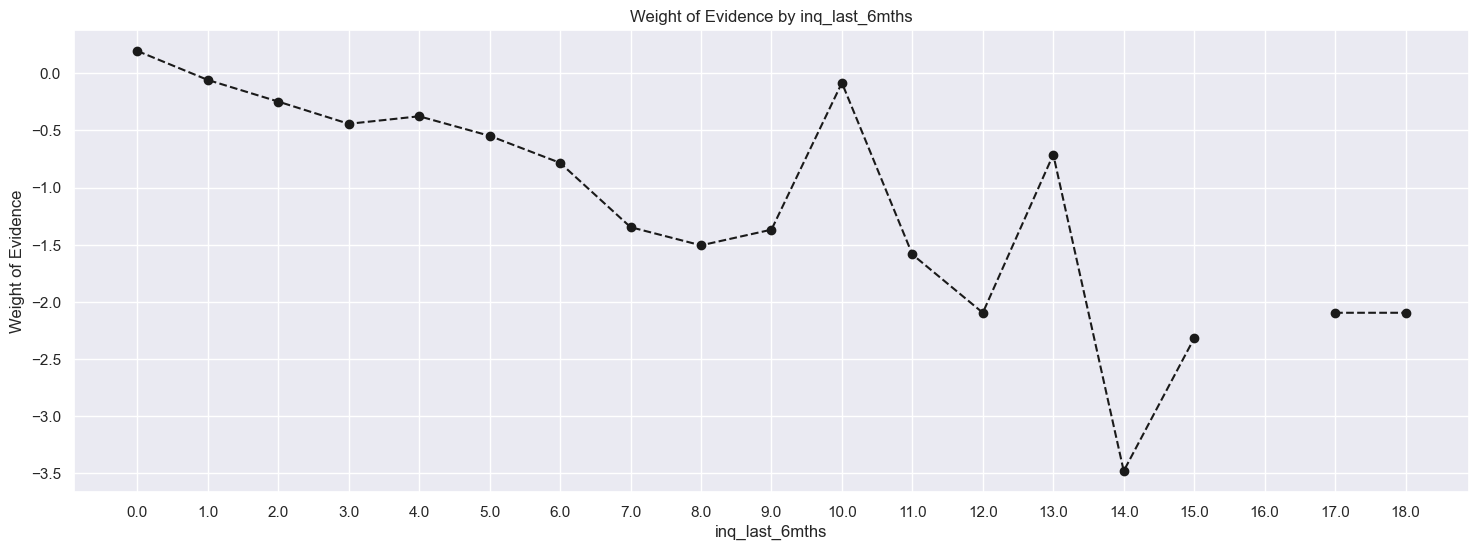

In [152]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [153]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [154]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_bad  prop_n_obs   n_bad   n_good  prop_n_good  \
0        0.0     29  0.241379    0.000078     7.0     22.0     0.000066   
1        1.0    110  0.127273    0.000295    14.0     96.0     0.000289   
2        2.0   1456  0.154533    0.003903   225.0   1231.0     0.003705   
3        3.0   4378  0.126313    0.011736   553.0   3825.0     0.011512   
4        4.0  10028  0.108496    0.026883  1088.0   8940.0     0.026907   
5        5.0  17141  0.108745    0.045951  1864.0  15277.0     0.045980   
6        6.0  24621  0.107632    0.066003  2650.0  21971.0     0.066128   
7        7.0  30169  0.108456    0.080876  3272.0  26897.0     0.080954   
8        8.0  33579  0.108967    0.090017  3659.0  29920.0     0.090053   
9        9.0  35251  0.110805    0.094500  3906.0  31345.0     0.094342   
10      10.0  33936  0.110944    0.090974  3765.0  30171.0     0.090808   
11      11.0  31372  0.114083    0.084101  3579.0  27793.0     0.083651   
12      12.0  27699  0.110762    0.074254  3068.0  24631.0     0.074134   
13      13.0  23892  0.104554    0.064049  2498.0  21394.0     0.064391   
14      14.0  19770  0.110673    0.052999  2188.0  17582.0     0.052918   
15      15.0  16228  0.108208    0.043503  1756.0  14472.0     0.043558   
16      16.0  13540  0.106056    0.036298  1436.0  12104.0     0.036430   
17      17.0  10712  0.108103    0.028716  1158.0   9554.0     0.028755   
18      18.0   8606  0.104811    0.023071   902.0   7704.0     0.023187   
19      19.0   6836  0.107373    0.018326   734.0   6102.0     0.018366   
20      20.0   5224  0.105858    0.014004   553.0   4671.0     0.014059   
21      21.0   4242  0.103017    0.011372   437.0   3805.0     0.011452   
22      22.0   3313  0.106248    0.008881   352.0   2961.0     0.008912   
23      23.0   2530  0.099209    0.006782   251.0   2279.0     0.006859   
24      24.0   1979  0.108641    0.005305   215.0   1764.0     0.005309   
25      25.0   1542  0.110246    0.004134   170.0   1372.0     0.004129   
26      26.0   1064  0.093045    0.002852    99.0    965.0     0.002904   
27      27.0    863  0.098494    0.002313    85.0    778.0     0.002342   
28      28.0    613  0.092985    0.001643    57.0    556.0     0.001673   
29      29.0    496  0.098790    0.001330    49.0    447.0     0.001345   
30      30.0    377  0.114058    0.001011    43.0    334.0     0.001005   
31      31.0    285  0.094737    0.000764    27.0    258.0     0.000777   
32      32.0    234  0.098291    0.000627    23.0    211.0     0.000635   
33      33.0    175  0.120000    0.000469    21.0    154.0     0.000464   
34      34.0    145  0.096552    0.000389    14.0    131.0     0.000394   
35      35.0    124  0.080645    0.000332    10.0    114.0     0.000343   
36      36.0    104  0.134615    0.000279    14.0     90.0     0.000271   
37      37.0     79  0.113924    0.000212     9.0     70.0     0.000211   
38      38.0     64  0.125000    0.000172     8.0     56.0     0.000169   
39      39.0     55  0.072727    0.000147     4.0     51.0     0.000153   
40      40.0     30  0.066667    0.000080     2.0     28.0     0.000084   
41      41.0     30  0.133333    0.000080     4.0     26.0     0.000078   
42      42.0     22  0.045455    0.000059     1.0     21.0     0.000063   
43      43.0     15  0.133333    0.000040     2.0     13.0     0.000039   
44      44.0     12  0.083333    0.000032     1.0     11.0     0.000033   
45      45.0     14  0.142857    0.000038     2.0     12.0     0.000036   
46      46.0      5  0.000000    0.000013     0.0      5.0     0.000015   
47      47.0      6  0.166667    0.000016     1.0      5.0     0.000015   
48      48.0      4  0.000000    0.000011     0.0      4.0     0.000012   
49      49.0      6  0.000000    0.000016     0.0      6.0     0.000018   
50      50.0      4  0.000000    0.000011     0.0      4.0     0.000012   
51      51.0      5  0.000000    0.000013     0.0      5.0     0.000015   
52      52.0      1  0.000000

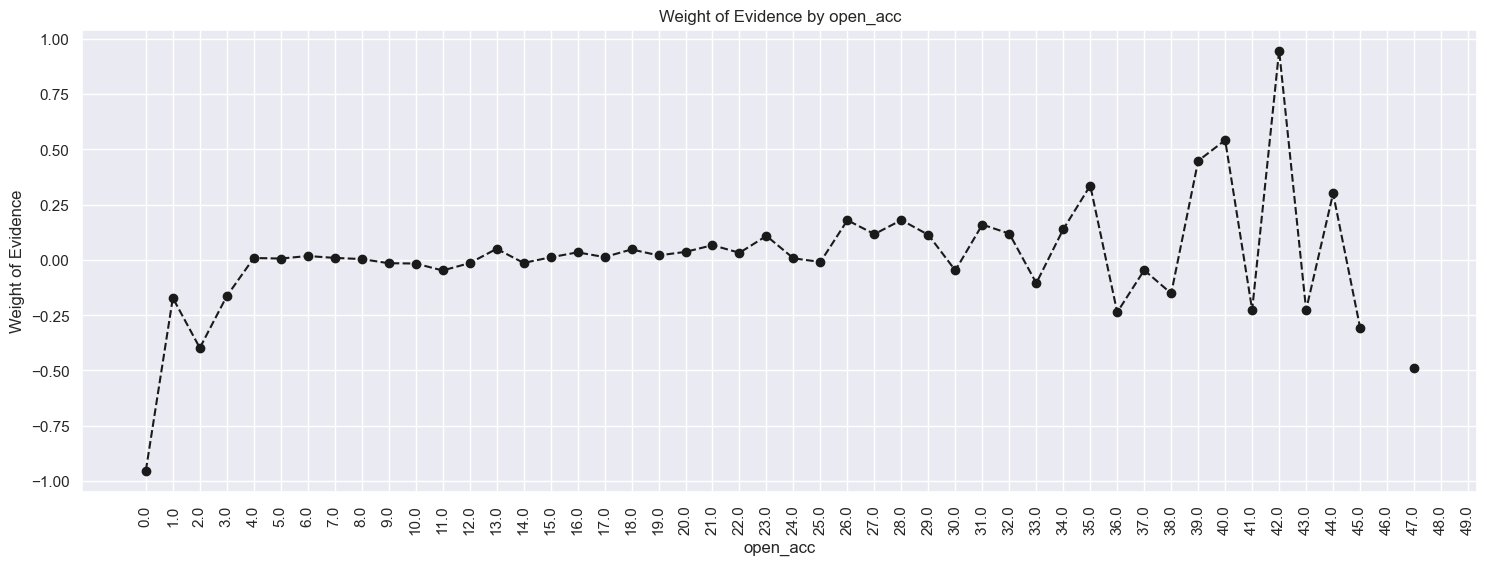

In [155]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

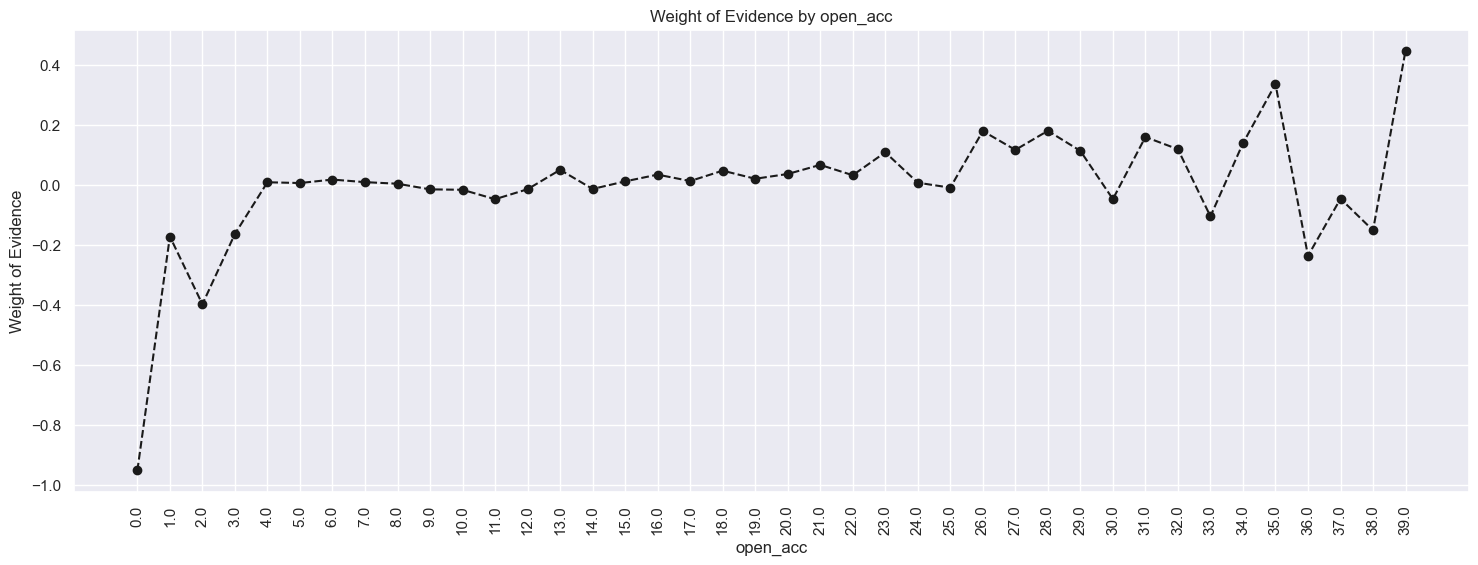

In [156]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [157]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [158]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec   n_obs  prop_bad  prop_n_obs    n_bad    n_good  prop_n_good  \
0       0.0  323999  0.110059    0.868565  35659.0  288340.0     0.867840   
1       1.0   42381  0.106581    0.113613   4517.0   37864.0     0.113962   
2       2.0    4527  0.096753    0.012136    438.0    4089.0     0.012307   
3       3.0    1280  0.079687    0.003431    102.0    1178.0     0.003546   
4       4.0     408  0.075980    0.001094     31.0     377.0     0.001135   
5       5.0     203  0.088670    0.000544     18.0     185.0     0.000557   
6       6.0     117  0.068376    0.000314      8.0     109.0     0.000328   
7       7.0      48  0.041667    0.000129      2.0      46.0     0.000138   
8       8.0      24  0.000000    0.000064      0.0      24.0     0.000072   
9       9.0      14  0.214286    0.000038      3.0      11.0     0.000033   
10     10.0      10  0.000000    0.000027      0.0      10.0     0.000030   
11     11.0       3  0.000000    0.000008      0.0       3.0     0.000009   
12     12.0       1  0.000000    0.000003      0.0       1.0     0.000003   
13     13.0       2  0.000000    0.000005      0.0       2.0     0.000006   
14     15.0       1  0.000000    0.000003      0.0       1.0     0.000003   
15     16.0       1  0.000000    0.000003      0.0       1.0     0.000003   
16     17.0       1  0.000000    0.000003      0.0       1.0     0.000003   
17     18.0       2  0.000000    0.000005      0.0       2.0     0.000006   
18     19.0       1  0.000000    0.000003      0.0       1.0     0.000003   
19     21.0       1  0.000000    0.000003      0.0       1.0     0.000003   
20     34.0       1  0.000000    0.000003      0.0       1.0     0.000003   
21     40.0       1  0.000000    0.000003      0.0       1.0     0.000003   
22     54.0       1  0.000000    0.000003      0.0       1.0     0.000003   
23     63.0       1  0.000000    0.000003      0.0       1.0     0.000003   

    prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0     0.874467 -0.007606            NaN       NaN  inf  
1     0.110771  0.028408       0.003478  0.036014  inf  
2     0.010741  0.136092       0.009828  0.107684  inf  
3     0.002501  0.348856       0.017065  0.212764  inf  
4     0.000760  0.400513       0.003707  0.051657  inf  
5     0.000441  0.232239       0.012690  0.168274  inf  
6     0.000196  0.514161       0.020294  0.281922  inf  
7     0.000049  1.037749       0.026709  0.523588  inf  
8     0.000000       inf       0.041667       inf  inf  
9     0.000074 -0.798462       0.214286       inf  inf  
10    0.000000       inf       0.214286       inf  inf  
11    0.000000       inf       0.000000       NaN  inf  
12    0.000000       inf       0.000000       NaN  inf  
13    0.000000       inf       0.000000       NaN  inf  
14    0.000000       inf       0.000000       NaN  inf  
15    0.000000       inf       0.000000       NaN  inf  
16    0.000000       inf       0.000000       NaN  inf  
17    0.000000       inf       0.000000       NaN  inf  
18    0.000000       inf       0.000000       NaN  inf  
19    0.000000       inf       0.000000       NaN  inf  
20    0.000000       inf       0.000000       NaN  inf  
21    0.000000       inf       0.000000       NaN  inf  
22    0.000000       inf       0.000000       NaN  inf  
23    0.000000       inf       0.000000       NaN  inf

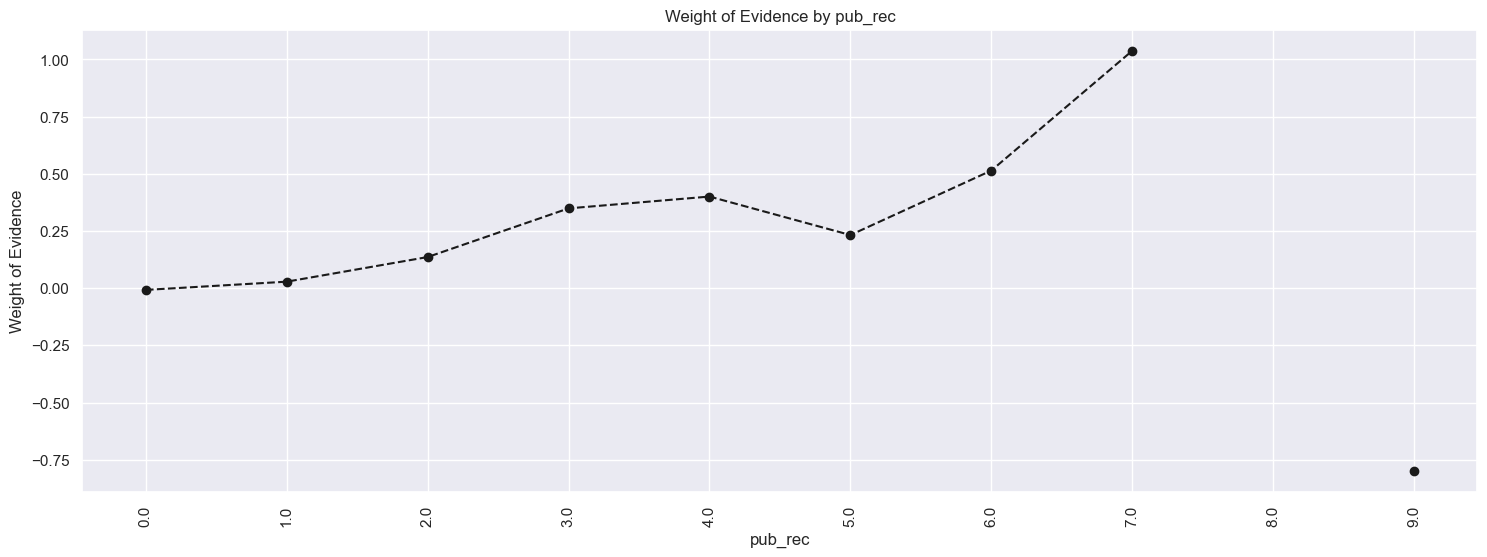

In [159]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [160]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [161]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


total_acc_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0      (-0.15, 3.0]    459  0.189542    0.001230    87.0    372.0   
1        (3.0, 6.0]   6004  0.135243    0.016095   812.0   5192.0   
2        (6.0, 9.0]  15047  0.126869    0.040337  1909.0  13138.0   
3       (9.0, 12.0]  25169  0.118717    0.067472  2988.0  22181.0   
4      (12.0, 15.0]  33651  0.118719    0.090210  3995.0  29656.0   
5      (15.0, 18.0]  38711  0.112733    0.103775  4364.0  34347.0   
6      (18.0, 21.0]  40599  0.113845    0.108836  4622.0  35977.0   
7      (21.0, 24.0]  40163  0.108508    0.107668  4358.0  35805.0   
8      (24.0, 27.0]  36286  0.104558    0.097274  3794.0  32492.0   
9      (27.0, 30.0]  31775  0.100897    0.085181  3206.0  28569.0   
10     (30.0, 33.0]  25900  0.105097    0.069432  2722.0  23178.0   
11     (33.0, 36.0]  20748  0.100733    0.055620  2090.0  18658.0   
12     (36.0, 39.0]  16055  0.098287    0.043040  1578.0  14477.0   
13     (39.0, 42.0]  12134  0.098813    0.032528  1199.0  10935.0   
14     (42.0, 45.0]   9107  0.103437    0.024414   942.0   8165.0   
15     (45.0, 48.0]   6494  0.105020    0.017409   682.0   5812.0   
16     (48.0, 51.0]   4551  0.099539    0.012200   453.0   4098.0   
17     (51.0, 54.0]   3260  0.090798    0.008739   296.0   2964.0   
18     (54.0, 57.0]   2146  0.095993    0.005753   206.0   1940.0   
19     (57.0, 60.0]   1605  0.105296    0.004303   169.0   1436.0   
20     (60.0, 63.0]   2164  0.101201    0.005801   219.0   1945.0   
21     (63.0, 66.0]    317  0.085174    0.000850    27.0    290.0   
22     (66.0, 69.0]    218  0.082569    0.000584    18.0    200.0   
23     (69.0, 72.0]    120  0.075000    0.000322     9.0    111.0   
24     (72.0, 75.0]    114  0.114035    0.000306    13.0    101.0   
25     (75.0, 78.0]     64  0.093750    0.000172     6.0     58.0   
26     (78.0, 81.0]     52  0.096154    0.000139     5.0     47.0   
27     (81.0, 84.0]     25  0.120000    0.000067     3.0     22.0   
28     (84.0, 87.0]     28  0.035714    0.000075     1.0     27.0   
29     (87.0, 90.0]     22  0.090909    0.000059     2.0     20.0   
30     (90.0, 93.0]     12  0.083333    0.000032     1.0     11.0   
31     (93.0, 96.0]      8  0.125000    0.000021     1.0      7.0   
32     (96.0, 99.0]      4  0.250000    0.000011     1.0      3.0   
33    (99.0, 102.0]      4  0.000000    0.000011     0.0      4.0   
34   (102.0, 105.0]      4  0.000000    0.000011     0.0      4.0   
35   (105.0, 108.0]      1  0.000000    0.000003     0.0      1.0   
36   (108.0, 111.0]      0       NaN    0.000000     NaN      NaN   
37   (111.0, 114.0]      0       NaN    0.000000     NaN      NaN   
38   (114.0, 117.0]      2  0.000000    0.000005     0.0      2.0   
39   (117.0, 120.0]      2  0.000000    0.000005     0.0      2.0   
40   (120.0, 123.0]      1  0.000000    0.000003     0.0      1.0   
41   (123.0, 126.0]      1  0.000000    0.000003     0.0      1.0   
42   (126.0, 129.0]      0       NaN    0.000000     NaN      NaN   
43   (129.0, 132.0]      0       NaN    0.000000     NaN      NaN   
44   (132.0, 135.0]      0       NaN    0.000000     NaN      NaN   
45   (135.0, 138.0]      0       NaN    0.000000     NaN      NaN   
46   (138.0, 141.0]      0       NaN    0.000000     NaN      NaN   
47   (141.0, 144.0]      0       NaN    0.000000     NaN      NaN   
48   (144.0, 147.0]      0       NaN    0.000000     NaN      NaN   
49   (147.0, 150.0]      1  0.000000    0.000003     0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0      0.001120    0.002134 -0.644759            NaN       NaN  inf  
1      0.015627    0.019913 -0.242371       0.054299  0.402388  inf  
2      0.039543    0.046814 -0.168816       0.008374  0.073555  inf  
3      0.066760    0.073275 -0.093113       0.008152  0.075703  inf  
4      0.089258    0.097969 -0.093124       0.000001  0.000011  inf  
5      0.103377    0.107018 -0.034619       0.005986  0.058505 

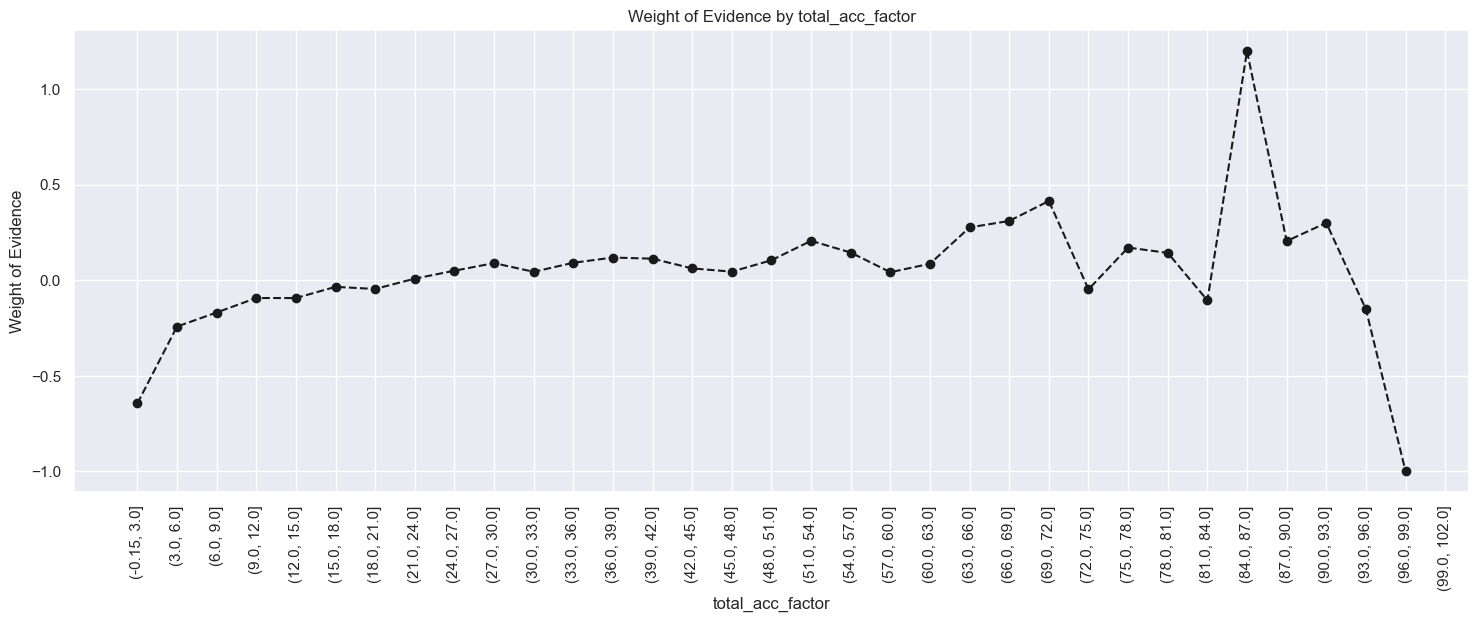

In [162]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [163]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [164]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0             0.0  371682  0.109352    0.996392  40644.0  331038.0   
1             1.0    1263  0.100554    0.003386    127.0    1136.0   
2             2.0      70  0.071429    0.000188      5.0      65.0   
3             3.0       7  0.142857    0.000019      1.0       6.0   
4             4.0       4  0.000000    0.000011      0.0       4.0   
5             5.0       2  0.500000    0.000005      1.0       1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0     0.996352    0.996714 -0.000363            NaN       NaN  inf  
1     0.003419    0.003114  0.093337       0.008797  0.093700  inf  
2     0.000196    0.000123  0.467204       0.029126  0.373868  inf  
3     0.000018    0.000025 -0.305986       0.071429  0.773190  inf  
4     0.000012    0.000000       inf       0.142857       inf  inf  
5     0.000003    0.000025 -2.097745       0.500000       inf  inf

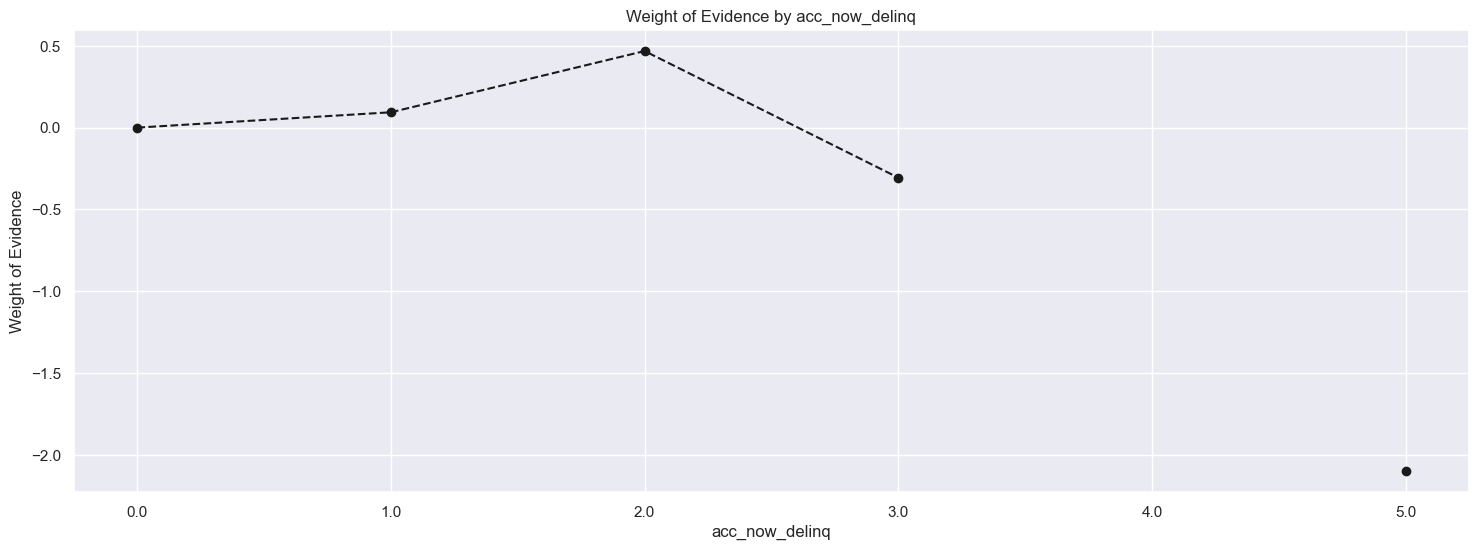

In [165]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [166]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [167]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
C:\Users\Pierre Pro\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_bad  prop_n_obs   n_bad  \
0            (-9999.999, 5000.0]  19417  0.133543    0.052052  2593.0   
1             (5000.0, 9999.999]  52655  0.123806    0.141156  6519.0   
2          (9999.999, 14999.998]  59570  0.119624    0.159693  7126.0   
3         (14999.998, 19999.998]  51455  0.122418    0.137939  6299.0   
4         (19999.998, 24999.997]  41582  0.114208    0.111472  4749.0   
...                          ...    ...       ...         ...     ...   
1995  (9974999.002, 9979999.002]      0       NaN    0.000000     NaN   
1996  (9979999.002, 9984999.002]      0       NaN    0.000000     NaN   
1997  (9984999.002, 9989999.001]      0       NaN    0.000000     NaN   
1998    (9989999.001, 9994999.0]      0       NaN    0.000000     NaN   
1999      (9994999.0, 9999999.0]      2  0.000000    0.000005     0.0   

       n_good  prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0     16824.0     0.050637    0.063588 -0.227754            NaN       NaN  inf  
1     46136.0     0.138859    0.159866 -0.140872       0.009737  0.086882  inf  
2     52444.0     0.157845    0.174751 -0.101749       0.004182  0.039123  inf  
3     45156.0     0.135910    0.154471 -0.128013       0.002794  0.026264  inf  
4     36833.0     0.110859    0.116460 -0.049285       0.008210  0.078728  inf  
...       ...          ...         ...       ...            ...       ...  ...  
1995      NaN          NaN         NaN       NaN            NaN       NaN  inf  
1996      NaN          NaN         NaN       NaN            NaN       NaN  inf  
1997      NaN          NaN         NaN       NaN            NaN       NaN  inf  
1998      NaN          NaN         NaN       NaN            NaN       NaN  inf  
1999      2.0     0.000006    0.000000       inf            NaN       NaN  inf  

[2000 rows x 12 columns]

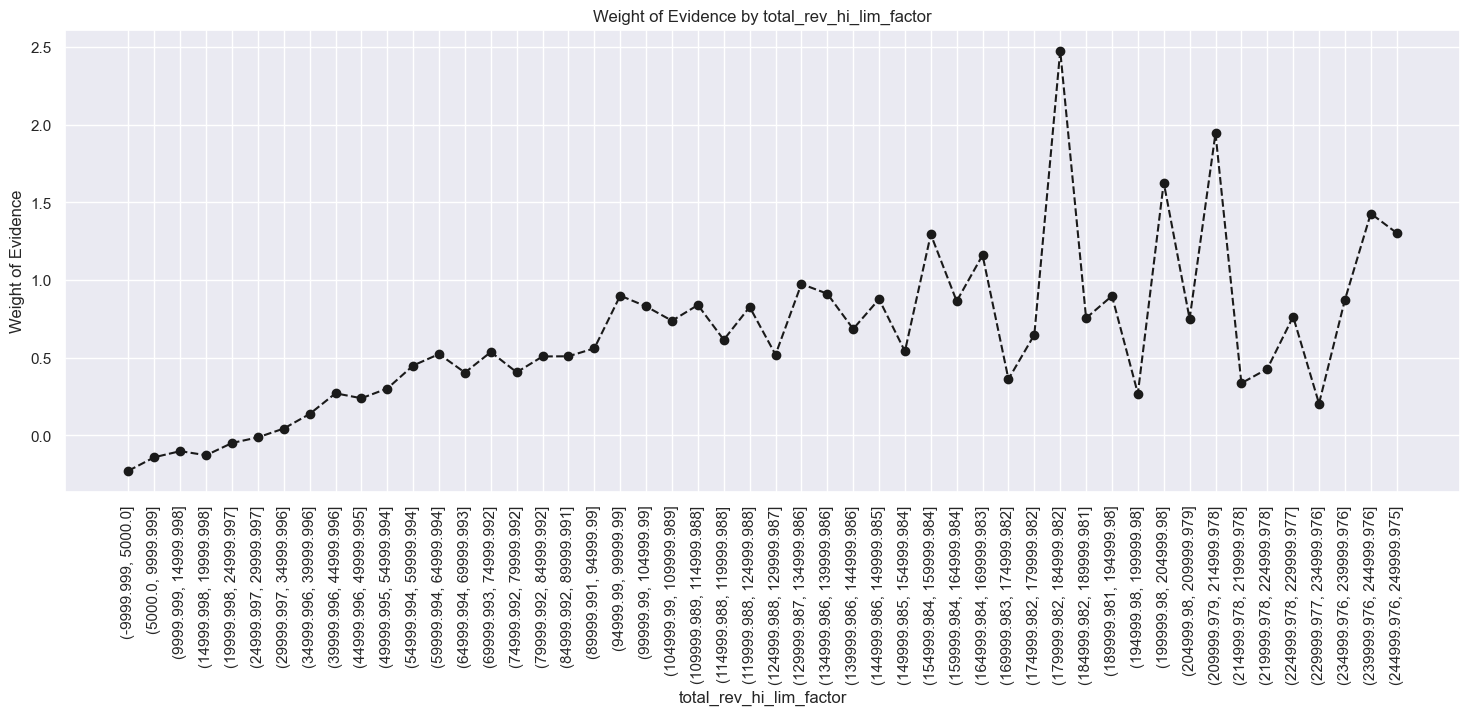

In [168]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [169]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [170]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


installment_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0       (14.276, 43.556]   1812  0.093819    0.004858   170.0   1642.0   
1       (43.556, 71.443]   4841  0.102458    0.012978   496.0   4345.0   
2       (71.443, 99.329]   6824  0.106975    0.018294   730.0   6094.0   
3      (99.329, 127.216]   9138  0.109652    0.024497  1002.0   8136.0   
4     (127.216, 155.102]  10040  0.103486    0.026915  1039.0   9001.0   
5     (155.102, 182.988]  16816  0.105792    0.045080  1779.0  15037.0   
6     (182.988, 210.875]  17216  0.095202    0.046152  1639.0  15577.0   
7     (210.875, 238.761]  15090  0.099602    0.040453  1503.0  13587.0   
8     (238.761, 266.648]  18842  0.098609    0.050511  1858.0  16984.0   
9     (266.648, 294.534]  20100  0.108905    0.053883  2189.0  17911.0   
10     (294.534, 322.42]  20364  0.103811    0.054591  2114.0  18250.0   
11     (322.42, 350.307]  25521  0.110576    0.068416  2822.0  22699.0   
12    (350.307, 378.193]  19006  0.114911    0.050951  2184.0  16822.0   
13     (378.193, 406.08]  18079  0.105703    0.048466  1911.0  16168.0   
14     (406.08, 433.966]  13345  0.120794    0.035775  1612.0  11733.0   
15    (433.966, 461.852]  12574  0.116828    0.033708  1469.0  11105.0   
16    (461.852, 489.739]  15685  0.106662    0.042048  1673.0  14012.0   
17    (489.739, 517.625]  15648  0.108065    0.041949  1691.0  13957.0   
18    (517.625, 545.512]  10775  0.136334    0.028885  1469.0   9306.0   
19    (545.512, 573.398]  10558  0.121898    0.028304  1287.0   9271.0   
20    (573.398, 601.284]   9464  0.120456    0.025371  1140.0   8324.0   
21    (601.284, 629.171]   9341  0.094422    0.025041   882.0   8459.0   
22    (629.171, 657.057]   8357  0.102429    0.022403   856.0   7501.0   
23    (657.057, 684.944]   9171  0.108821    0.024585   998.0   8173.0   
24     (684.944, 712.83]   6171  0.121698    0.016543   751.0   5420.0   
25     (712.83, 740.716]   4841  0.116092    0.012978   562.0   4279.0   
26    (740.716, 768.603]   5231  0.105525    0.014023   552.0   4679.0   
27    (768.603, 796.489]   4926  0.096833    0.013205   477.0   4449.0   
28    (796.489, 824.376]   4050  0.110617    0.010857   448.0   3602.0   
29    (824.376, 852.262]   3643  0.112545    0.009766   410.0   3233.0   
30    (852.262, 880.148]   4260  0.107042    0.011420   456.0   3804.0   
31    (880.148, 908.035]   3247  0.129658    0.008704   421.0   2826.0   
32    (908.035, 935.921]   2189  0.126085    0.005868   276.0   1913.0   
33    (935.921, 963.808]   2440  0.123361    0.006541   301.0   2139.0   
34    (963.808, 991.694]   1787  0.165641    0.004791   296.0   1491.0   
35    (991.694, 1019.58]   1617  0.141002    0.004335   228.0   1389.0   
36   (1019.58, 1047.467]   1267  0.129440    0.003397   164.0   1103.0   
37  (1047.467, 1075.353]    898  0.111359    0.002407   100.0    798.0   
38   (1075.353, 1103.24]   1035  0.072464    0.002775    75.0    960.0   
39   (1103.24, 1131.126]    832  0.079327    0.002230    66.0    766.0   
40  (1131.126, 1159.012]    972  0.079218    0.002606    77.0    895.0   
41  (1159.012, 1186.899]   1181  0.082134    0.003166    97.0   1084.0   
42  (1186.899, 1214.785]   1252  0.099042    0.003356   124.0   1128.0   
43  (1214.785, 1242.672]   1019  0.108930    0.002732   111.0    908.0   
44  (1242.672, 1270.558]    711  0.140647    0.001906   100.0    611.0   
45  (1270.558, 1298.444]    457  0.170678    0.001225    78.0    379.0   
46  (1298.444, 1326.331]    197  0.238579    0.000528    47.0    150.0   
47  (1326.331, 1354.217]    121  0.239669    0.000324    29.0     92.0   
48  (1354.217, 1382.104]     41  0.292683    0.000110    12.0     29.0   
49   (1382.104, 1409.99]     36  0.194444    0.000097     7.0     29.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.004942    0.004169  0.170127            NaN       NaN  0.013497  
1      0.013078    0.012163  0.072460       0.008639  0.097667  0.013497  
2     

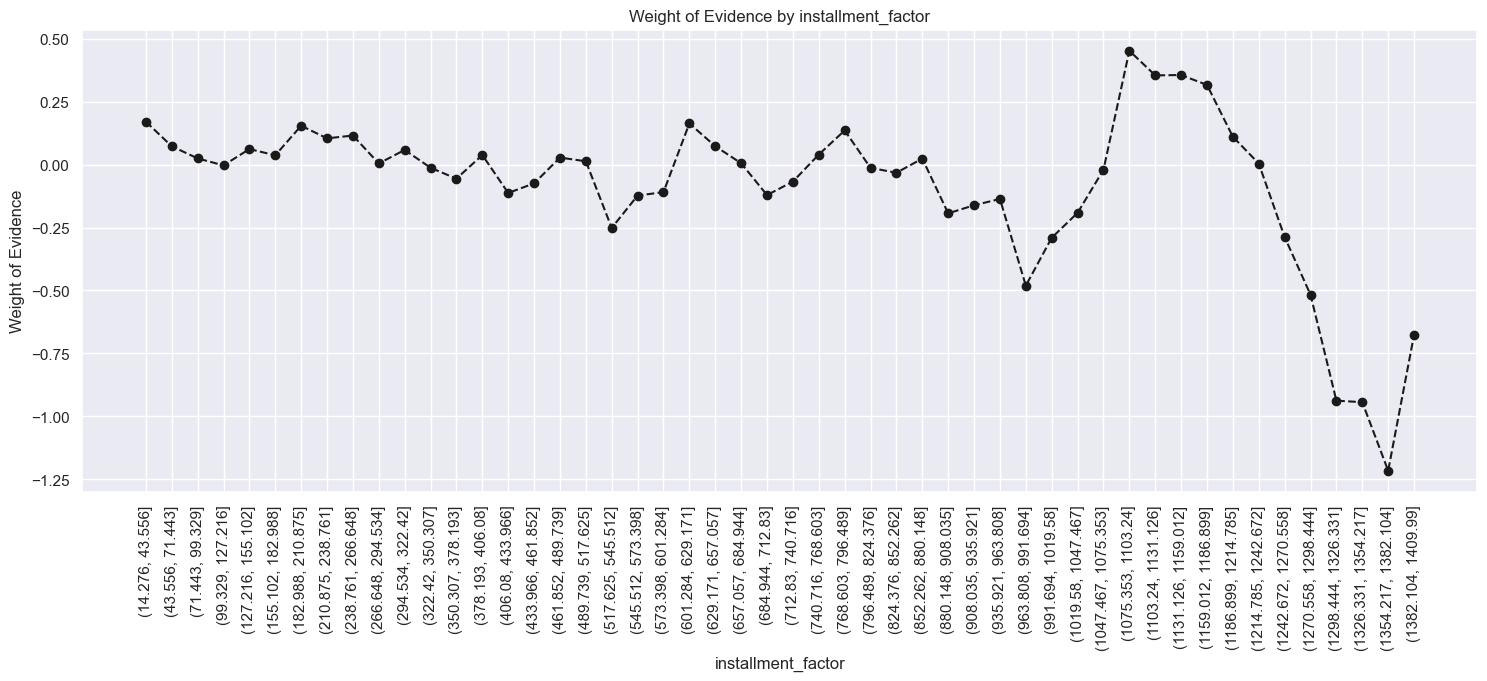

In [171]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
# The variable won't be used because we don't see the trend

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [173]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0     (-5243.882, 144693.64]  351904  0.111434    0.943372  39214.0  312690.0   
1     (144693.64, 287491.28]   19004  0.074563    0.050945   1417.0   17587.0   
2     (287491.28, 430288.92]    1525  0.069508    0.004088    106.0    1419.0   
3     (430288.92, 573086.56]     332  0.060241    0.000890     20.0     312.0   
4      (573086.56, 715884.2]     112  0.116071    0.000300     13.0      99.0   
5      (715884.2, 858681.84]      65  0.107692    0.000174      7.0      58.0   
6    (858681.84, 1001479.48]      39  0.025641    0.000105      1.0      38.0   
7   (1001479.48, 1144277.12]      10  0.000000    0.000027      0.0      10.0   
8   (1144277.12, 1287074.76]      12  0.000000    0.000032      0.0      12.0   
9    (1287074.76, 1429872.4]       6  0.000000    0.000016      0.0       6.0   
10   (1429872.4, 1572670.04]       3  0.000000    0.000008      0.0       3.0   
11  (1572670.04, 1715467.68]       1  0.000000    0.000003      0.0       1.0   
12  (1715467.68, 1858265.32]       1  0.000000    0.000003      0.0       1.0   
13  (1858265.32, 2001062.96]       6  0.000000    0.000016      0.0       6.0   
14   (2001062.96, 2143860.6]       1  0.000000    0.000003      0.0       1.0   
15   (2143860.6, 2286658.24]       0       NaN    0.000000      NaN       NaN   
16  (2286658.24, 2429455.88]       0       NaN    0.000000      NaN       NaN   
17  (2429455.88, 2572253.52]       0       NaN    0.000000      NaN       NaN   
18  (2572253.52, 2715051.16]       0       NaN    0.000000      NaN       NaN   
19   (2715051.16, 2857848.8]       0       NaN    0.000000      NaN       NaN   
20   (2857848.8, 3000646.44]       0       NaN    0.000000      NaN       NaN   
21  (3000646.44, 3143444.08]       0       NaN    0.000000      NaN       NaN   
22  (3143444.08, 3286241.72]       0       NaN    0.000000      NaN       NaN   
23  (3286241.72, 3429039.36]       0       NaN    0.000000      NaN       NaN   
24   (3429039.36, 3571837.0]       0       NaN    0.000000      NaN       NaN   
25   (3571837.0, 3714634.64]       0       NaN    0.000000      NaN       NaN   
26  (3714634.64, 3857432.28]       0       NaN    0.000000      NaN       NaN   
27  (3857432.28, 4000229.92]       1  0.000000    0.000003      0.0       1.0   
28  (4000229.92, 4143027.56]       0       NaN    0.000000      NaN       NaN   
29   (4143027.56, 4285825.2]       0       NaN    0.000000      NaN       NaN   
30   (4285825.2, 4428622.84]       0       NaN    0.000000      NaN       NaN   
31  (4428622.84, 4571420.48]       1  0.000000    0.000003      0.0       1.0   
32  (4571420.48, 4714218.12]       0       NaN    0.000000      NaN       NaN   
33  (4714218.12, 4857015.76]       0       NaN    0.000000      NaN       NaN   
34   (4857015.76, 4999813.4]       1  0.000000    0.000003      0.0       1.0   
35   (4999813.4, 5142611.04]       1  0.000000    0.000003      0.0       1.0   
36  (5142611.04, 5285408.68]       0       NaN    0.000000      NaN       NaN   
37  (5285408.68, 5428206.32]       0       NaN    0.000000      NaN       NaN   
38  (5428206.32, 5571003.96]       0       NaN    0.000000      NaN       NaN   
39   (5571003.96, 5713801.6]       0       NaN    0.000000      NaN       NaN   
40   (5713801.6, 5856599.24]       0       NaN    0.000000      NaN       NaN   
41  (5856599.24, 5999396.88]       0       NaN    0.000000      NaN       NaN   
42  (5999396.88, 6142194.52]       2  0.000000    0.000005      0.0       2.0   
43  (6142194.52, 6284992.16]       0       NaN    0.000000      NaN       NaN   
44   (6284992.16, 6427789.8]       0       NaN    0.000000      NaN       NaN   
45   (6427789.8, 6570587.44]       0       NaN    0.000000      NaN       NaN   
46  (6570587.44, 6713385.08]       0       NaN    0.000000      NaN       NaN   
47  (6713385.08, 6856182.72]       0       NaN    0.000000      NaN       NaN   
48  (6856182.72, 6998980.36]       0      

In [174]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_bad  prop_n_obs    n_bad    n_good  \
0      (-5243.882, 73294.82]  231445  0.124099    0.620449  28722.0  202723.0   
1      (73294.82, 144693.64]  120459  0.087100    0.322922  10492.0  109967.0   
2     (144693.64, 216092.46]   15885  0.074913    0.042584   1190.0   14695.0   
3     (216092.46, 287491.28]    3119  0.072780    0.008361    227.0    2892.0   
4      (287491.28, 358890.1]    1117  0.070725    0.002994     79.0    1038.0   
5      (358890.1, 430288.92]     408  0.066176    0.001094     27.0     381.0   
6     (430288.92, 501687.74]     245  0.053061    0.000657     13.0     232.0   
7     (501687.74, 573086.56]      87  0.080460    0.000233      7.0      80.0   
8     (573086.56, 644485.38]      61  0.131148    0.000164      8.0      53.0   
9      (644485.38, 715884.2]      51  0.098039    0.000137      5.0      46.0   
10     (715884.2, 787283.02]      37  0.054054    0.000099      2.0      35.0   
11    (787283.02, 858681.84]      28  0.178571    0.000075      5.0      23.0   
12    (858681.84, 930080.66]      17  0.000000    0.000046      0.0      17.0   
13   (930080.66, 1001479.48]      22  0.045455    0.000059      1.0      21.0   
14   (1001479.48, 1072878.3]       3  0.000000    0.000008      0.0       3.0   
15   (1072878.3, 1144277.12]       7  0.000000    0.000019      0.0       7.0   
16  (1144277.12, 1215675.94]       8  0.000000    0.000021      0.0       8.0   
17  (1215675.94, 1287074.76]       4  0.000000    0.000011      0.0       4.0   
18  (1287074.76, 1358473.58]       4  0.000000    0.000011      0.0       4.0   
19   (1358473.58, 1429872.4]       2  0.000000    0.000005      0.0       2.0   
20   (1429872.4, 1501271.22]       2  0.000000    0.000005      0.0       2.0   
21  (1501271.22, 1572670.04]       1  0.000000    0.000003      0.0       1.0   
22  (1572670.04, 1644068.86]       1  0.000000    0.000003      0.0       1.0   
23  (1644068.86, 1715467.68]       0       NaN    0.000000      NaN       NaN   
24   (1715467.68, 1786866.5]       1  0.000000    0.000003      0.0       1.0   
25   (1786866.5, 1858265.32]       0       NaN    0.000000      NaN       NaN   
26  (1858265.32, 1929664.14]       1  0.000000    0.000003      0.0       1.0   
27  (1929664.14, 2001062.96]       5  0.000000    0.000013      0.0       5.0   
28  (2001062.96, 2072461.78]       1  0.000000    0.000003      0.0       1.0   
29   (2072461.78, 2143860.6]       0       NaN    0.000000      NaN       NaN   
30   (2143860.6, 2215259.42]       0       NaN    0.000000      NaN       NaN   
31  (2215259.42, 2286658.24]       0       NaN    0.000000      NaN       NaN   
32  (2286658.24, 2358057.06]       0       NaN    0.000000      NaN       NaN   
33  (2358057.06, 2429455.88]       0       NaN    0.000000      NaN       NaN   
34   (2429455.88, 2500854.7]       0       NaN    0.000000      NaN       NaN   
35   (2500854.7, 2572253.52]       0       NaN    0.000000      NaN       NaN   
36  (2572253.52, 2643652.34]       0       NaN    0.000000      NaN       NaN   
37  (2643652.34, 2715051.16]       0       NaN    0.000000      NaN       NaN   
38  (2715051.16, 2786449.98]       0       NaN    0.000000      NaN       NaN   
39   (2786449.98, 2857848.8]       0       NaN    0.000000      NaN       NaN   
40   (2857848.8, 2929247.62]       0       NaN    0.000000      NaN       NaN   
41  (2929247.62, 3000646.44]       0       NaN    0.000000      NaN       NaN   
42  (3000646.44, 3072045.26]       0       NaN    0.000000      NaN       NaN   
43  (3072045.26, 3143444.08]       0       NaN    0.000000      NaN       NaN   
44   (3143444.08, 3214842.9]       0       NaN    0.000000      NaN       NaN   
45   (3214842.9, 3286241.72]       0       NaN    0.000000      NaN       NaN   
46  (3286241.72, 3357640.54]       0       NaN    0.000000      NaN       NaN   
47  (3357640.54, 3429039.36]       0       NaN    0.000000      NaN       NaN   
48  (3429039.36, 3500438.18]       0      

In [175]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [176]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\2302312666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will

annual_inc_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  \
0      (1757.896, 4658.08]     15  0.200000    0.000043     3.0     12.0   
1       (4658.08, 7420.16]     40  0.250000    0.000114    10.0     30.0   
2      (7420.16, 10182.24]    287  0.125436    0.000818    36.0    251.0   
3     (10182.24, 12944.32]    547  0.171846    0.001558    94.0    453.0   
4      (12944.32, 15706.4]   1210  0.169421    0.003447   205.0   1005.0   
5      (15706.4, 18468.48]   1522  0.152431    0.004335   232.0   1290.0   
6     (18468.48, 21230.56]   2928  0.144467    0.008340   423.0   2505.0   
7     (21230.56, 23992.64]   2495  0.155511    0.007107   388.0   2107.0   
8     (23992.64, 26754.72]   7016  0.151368    0.019985  1062.0   5954.0   
9      (26754.72, 29516.8]   5643  0.142655    0.016074   805.0   4838.0   
10     (29516.8, 32278.88]  11915  0.140495    0.033940  1674.0  10241.0   
11    (32278.88, 35040.96]  12241  0.139041    0.034868  1702.0  10539.0   
12    (35040.96, 37803.04]   7905  0.141050    0.022517  1115.0   6790.0   
13    (37803.04, 40565.12]  17910  0.133557    0.051017  2392.0  15518.0   
14     (40565.12, 43327.2]  12508  0.130636    0.035629  1634.0  10874.0   
15     (43327.2, 46089.28]  16590  0.127125    0.047257  2109.0  14481.0   
16    (46089.28, 48851.36]   9878  0.122494    0.028137  1210.0   8668.0   
17    (48851.36, 51613.44]  19024  0.120427    0.054190  2291.0  16733.0   
18    (51613.44, 54375.52]  12766  0.113740    0.036364  1452.0  11314.0   
19     (54375.52, 57137.6]  16153  0.112982    0.046012  1825.0  14328.0   
20     (57137.6, 59899.68]   6482  0.115705    0.018464   750.0   5732.0   
21    (59899.68, 62661.76]  21299  0.118691    0.060670  2528.0  18771.0   
22    (62661.76, 65423.84]  16090  0.110317    0.045832  1775.0  14315.0   
23    (65423.84, 68185.92]   7942  0.102241    0.022623   812.0   7130.0   
24     (68185.92, 70948.0]  12982  0.106224    0.036979  1379.0  11603.0   
25     (70948.0, 73710.08]   8385  0.101371    0.023885   850.0   7535.0   
26    (73710.08, 76472.16]  13145  0.098288    0.037444  1292.0  11853.0   
27    (76472.16, 79234.24]   5679  0.098081    0.016177   557.0   5122.0   
28    (79234.24, 81996.32]  11397  0.098535    0.032464  1123.0  10274.0   
29     (81996.32, 84758.4]   6063  0.087251    0.017270   529.0   5534.0   
30     (84758.4, 87520.48]   9980  0.090782    0.028428   906.0   9074.0   
31    (87520.48, 90282.56]  10393  0.091023    0.029604   946.0   9447.0   
32    (90282.56, 93044.64]   4337  0.085543    0.012354   371.0   3966.0   
33    (93044.64, 95806.72]   5634  0.085020    0.016048   479.0   5155.0   
34     (95806.72, 98568.8]   4667  0.088708    0.013294   414.0   4253.0   
35    (98568.8, 101330.88]   8793  0.084954    0.025047   747.0   8046.0   
36  (101330.88, 104092.96]   3232  0.080136    0.009206   259.0   2973.0   
37  (104092.96, 106855.04]   3736  0.076285    0.010642   285.0   3451.0   
38  (106855.04, 109617.12]   2277  0.078173    0.006486   178.0   2099.0   
39   (109617.12, 112379.2]   5714  0.084354    0.016276   482.0   5232.0   
40   (112379.2, 115141.28]   3218  0.061840    0.009166   199.0   3019.0   
41  (115141.28, 117903.36]   1128  0.080674    0.003213    91.0   1037.0   
42  (117903.36, 120665.44]   6228  0.086545    0.017740   539.0   5689.0   
43  (120665.44, 123427.52]   1043  0.062320    0.002971    65.0    978.0   
44   (123427.52, 126189.6]   3566  0.078239    0.010158   279.0   3287.0   
45   (126189.6, 128951.68]    791  0.082174    0.002253    65.0    726.0   
46  (128951.68, 131713.76]   3033  0.069238    0.008639   210.0   2823.0   
47  (131713.76, 134475.84]    801  0.076155    0.002282    61.0    740.0   
48  (134475.84, 137237.92]   1902  0.057834    0.005418   110.0   1792.0   
49   (137237.92, 140000.0]   2532  0.075829    0.007212   192.0   2340.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE        IV  
0      0.000038    0.000077 -0.689458            NaN     

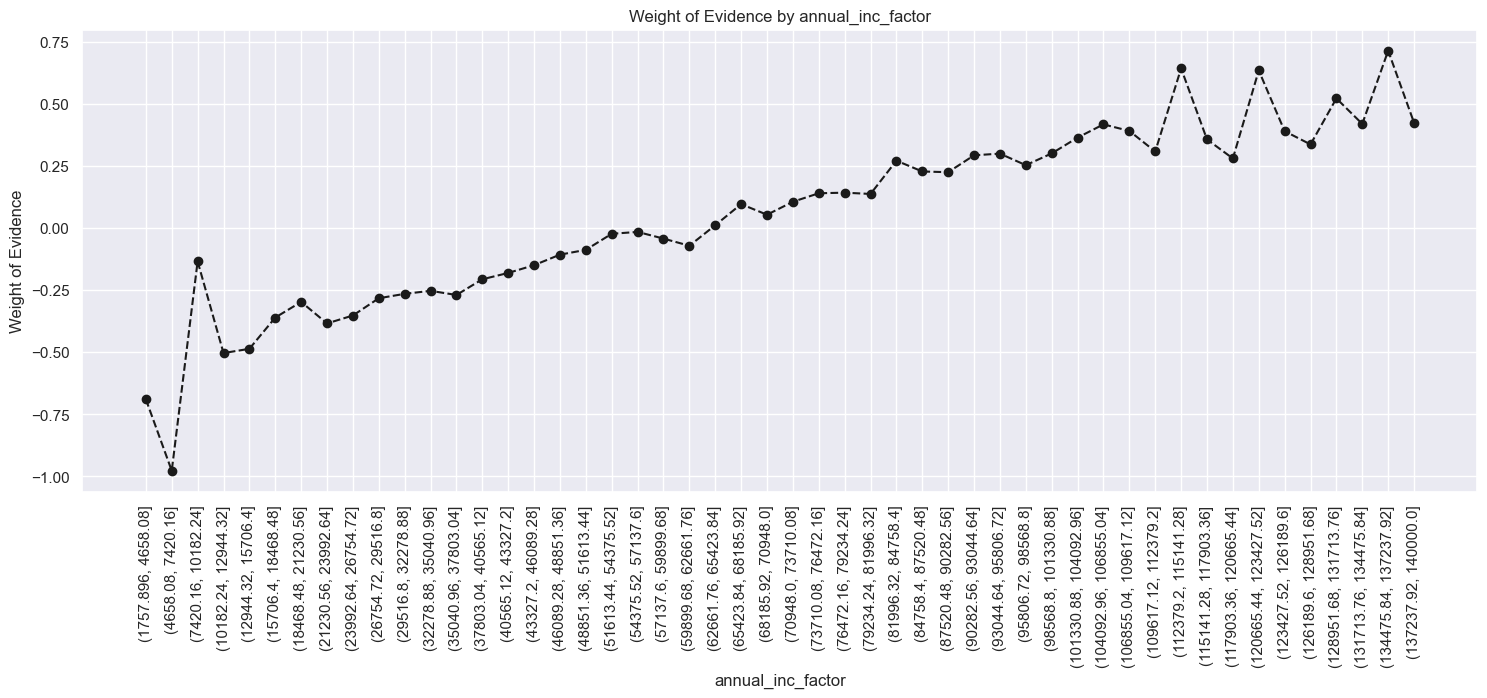

In [177]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [178]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3226331627.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3226331627.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
C:\Users\Pierre Pro\

In [179]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\1373989647.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\1373989647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\40

mths_since_last_delinq_factor  n_obs  prop_bad  prop_n_obs   n_bad  \
0                 (-0.188, 3.76]   5277  0.128482    0.030531   678.0   
1                   (3.76, 7.52]  11167  0.112385    0.064608  1255.0   
2                  (7.52, 11.28]  13306  0.107170    0.076983  1426.0   
3                 (11.28, 15.04]  13216  0.111153    0.076462  1469.0   
4                  (15.04, 18.8]   9337  0.105066    0.054020   981.0   
5                  (18.8, 22.56]  11641  0.107293    0.067350  1249.0   
6                 (22.56, 26.32]  10887  0.103702    0.062988  1129.0   
7                 (26.32, 30.08]  10560  0.104924    0.061096  1108.0   
8                 (30.08, 33.84]   7576  0.097809    0.043832   741.0   
9                  (33.84, 37.6]   9795  0.102603    0.056670  1005.0   
10                 (37.6, 41.36]   9352  0.108212    0.054107  1012.0   
11                (41.36, 45.12]   9202  0.103347    0.053239   951.0   
12                (45.12, 48.88]   6538  0.102172    0.037826   668.0   
13                (48.88, 52.64]   6486  0.111317    0.037525   722.0   
14                 (52.64, 56.4]   6045  0.107361    0.034974   649.0   
15                 (56.4, 60.16]   5867  0.097494    0.033944   572.0   
16                (60.16, 63.92]   4040  0.112624    0.023374   455.0   
17                (63.92, 67.68]   5314  0.107828    0.030745   573.0   
18                (67.68, 71.44]   5141  0.110679    0.029744   569.0   
19                 (71.44, 75.2]   4950  0.113737    0.028639   563.0   
20                 (75.2, 78.96]   3312  0.108092    0.019162   358.0   
21                (78.96, 82.72]   3577  0.114901    0.020695   411.0   
22                (82.72, 86.48]     94  0.212766    0.000544    20.0   
23                (86.48, 90.24]     38  0.105263    0.000220     4.0   
24                 (90.24, 94.0]     32  0.062500    0.000185     2.0   
25                 (94.0, 97.76]     20  0.250000    0.000116     5.0   
26               (97.76, 101.52]     13  0.076923    0.000075     1.0   
27              (101.52, 105.28]     11  0.090909    0.000064     1.0   
28              (105.28, 109.04]      8  0.250000    0.000046     2.0   
29               (109.04, 112.8]      2  0.500000    0.000012     1.0   
30               (112.8, 116.56]      7  0.142857    0.000040     1.0   
31              (116.56, 120.32]      2  0.000000    0.000012     0.0   
32              (120.32, 124.08]      1  0.000000    0.000006     0.0   
33              (124.08, 127.84]      2  0.000000    0.000012     0.0   
34               (127.84, 131.6]      5  0.000000    0.000029     0.0   
35               (131.6, 135.36]      7  0.285714    0.000040     2.0   
36              (135.36, 139.12]      2  0.000000    0.000012     0.0   
37              (139.12, 142.88]      3  0.000000    0.000017     0.0   
38              (142.88, 146.64]      1  0.000000    0.000006     0.0   
39               (146.64, 150.4]      3  0.333333    0.000017     1.0   
40               (150.4, 154.16]      2  0.500000    0.000012     1.0   
41              (154.16, 157.92]      1  0.000000    0.000006     0.0   
42              (157.92, 161.68]      1  0.000000    0.000006     0.0   
43              (161.68, 165.44]      0       NaN    0.000000     NaN   
44               (165.44, 169.2]      0       NaN    0.000000     NaN   
45               (169.2, 172.96]      0       NaN    0.000000     NaN   
46              (172.96, 176.72]      0       NaN    0.000000     NaN   
47              (176.72, 180.48]      1  0.000000    0.000006     0.0   
48              (180.48, 184.24]      0       NaN    0.000000     NaN   
49               (184.24, 188.0]      1  0.000000    0.000006     0.0   

     n_good  prop_n_good  prop_n_bad       WoE  diff_prop_bad  diff_WoE   IV  
0    4599.0     0.029814    0.036481 -0.201825            NaN       NaN  inf  
1    9912.0     0.064256    0.067528 -0.049661       0.016097  0.152164  inf  
2   11880.0     0.077014    0.076729  0.00

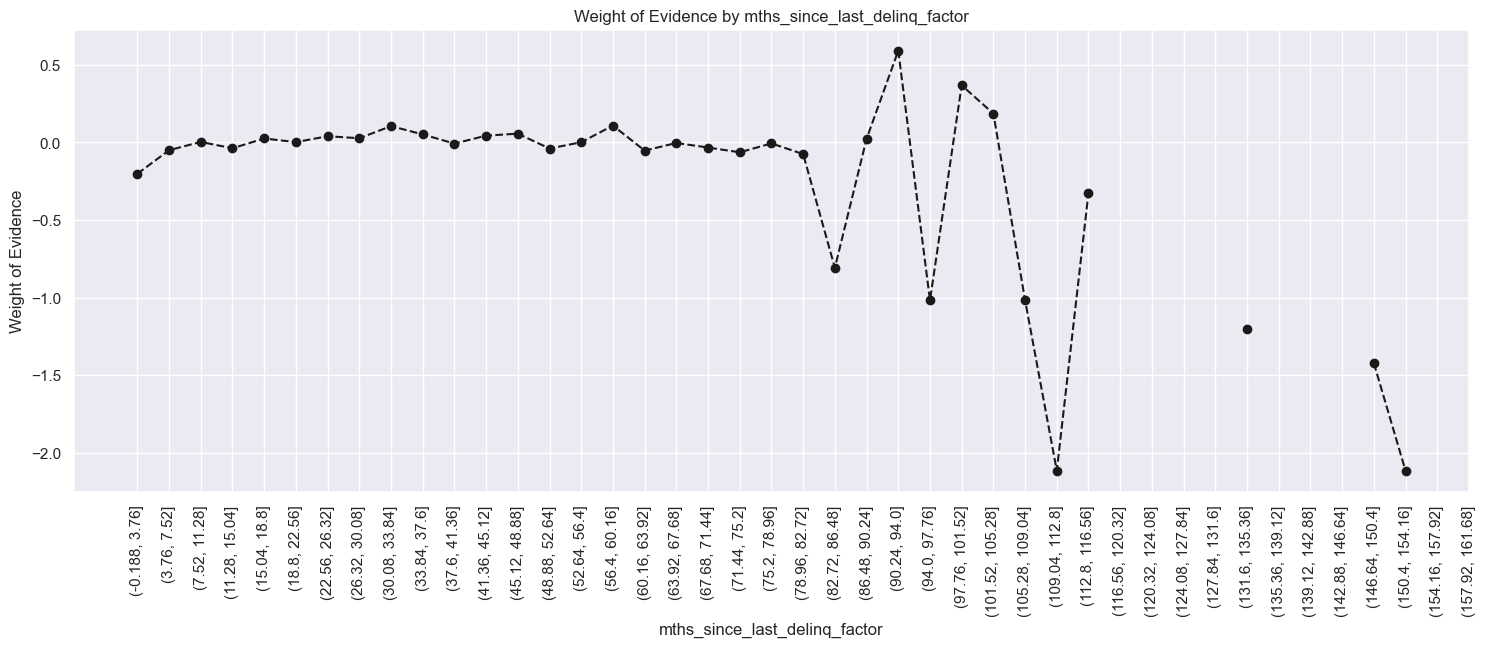

In [180]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [181]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3878719826.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3878719826.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
C:\Users\Pier

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [183]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3847891282.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

dti_factor  n_obs  prop_bad  prop_n_obs  n_bad  n_good  prop_n_good  \
0       (-0.04, 0.4]    745  0.123490    0.001997   92.0   653.0     0.001965   
1         (0.4, 0.8]    808  0.080446    0.002166   65.0   743.0     0.002236   
2         (0.8, 1.2]    922  0.103037    0.002472   95.0   827.0     0.002489   
3         (1.2, 1.6]   1043  0.103547    0.002796  108.0   935.0     0.002814   
4         (1.6, 2.0]   1172  0.097270    0.003142  114.0  1058.0     0.003184   
5       (2.0, 2.399]   1337  0.083022    0.003584  111.0  1226.0     0.003690   
6     (2.399, 2.799]   1538  0.083875    0.004123  129.0  1409.0     0.004241   
7     (2.799, 3.199]   1696  0.095519    0.004547  162.0  1534.0     0.004617   
8     (3.199, 3.599]   1927  0.099637    0.005166  192.0  1735.0     0.005222   
9     (3.599, 3.999]   2197  0.085571    0.005890  188.0  2009.0     0.006047   
10    (3.999, 4.399]   2466  0.083131    0.006611  205.0  2261.0     0.006805   
11    (4.399, 4.799]   2571  0.082458    0.006892  212.0  2359.0     0.007100   
12    (4.799, 5.199]   2906  0.086717    0.007790  252.0  2654.0     0.007988   
13    (5.199, 5.599]   3083  0.089848    0.008265  277.0  2806.0     0.008445   
14    (5.599, 5.999]   3252  0.079951    0.008718  260.0  2992.0     0.009005   
15    (5.999, 6.398]   3529  0.089827    0.009460  317.0  3212.0     0.009667   
16    (6.398, 6.798]   3766  0.087892    0.010096  331.0  3435.0     0.010339   
17    (6.798, 7.198]   3899  0.085407    0.010452  333.0  3566.0     0.010733   
18    (7.198, 7.598]   4239  0.084454    0.011364  358.0  3881.0     0.011681   
19    (7.598, 7.998]   4508  0.084516    0.012085  381.0  4127.0     0.012421   
20    (7.998, 8.398]   4677  0.087022    0.012538  407.0  4270.0     0.012852   
21    (8.398, 8.798]   4895  0.090092    0.013122  441.0  4454.0     0.013406   
22    (8.798, 9.198]   5129  0.091246    0.013750  468.0  4661.0     0.014029   
23    (9.198, 9.598]   5191  0.093624    0.013916  486.0  4705.0     0.014161   
24    (9.598, 9.998]   5471  0.089929    0.014666  492.0  4979.0     0.014986   
25   (9.998, 10.397]   5621  0.093400    0.015069  525.0  5096.0     0.015338   
26  (10.397, 10.797]   5824  0.091518    0.015613  533.0  5291.0     0.015925   
27  (10.797, 11.197]   6116  0.102845    0.016396  629.0  5487.0     0.016515   
28  (11.197, 11.597]   6168  0.089008    0.016535  549.0  5619.0     0.016912   
29  (11.597, 11.997]   6303  0.096145    0.016897  606.0  5697.0     0.017147   
30  (11.997, 12.397]   6457  0.092768    0.017310  599.0  5858.0     0.017631   
31  (12.397, 12.797]   6789  0.103255    0.018200  701.0  6088.0     0.018324   
32  (12.797, 13.197]   6667  0.095995    0.017873  640.0  6027.0     0.018140   
33  (13.197, 13.597]   6769  0.100753    0.018146  682.0  6087.0     0.018321   
34  (13.597, 13.997]   6854  0.102714    0.018374  704.0  6150.0     0.018510   
35  (13.997, 14.396]   6855  0.099198    0.018377  680.0  6175.0     0.018585   
36  (14.396, 14.796]   7081  0.094761    0.018982  671.0  6410.0     0.019293   
37  (14.796, 15.196]   6964  0.101522    0.018669  707.0  6257.0     0.018832   
38  (15.196, 15.596]   6811  0.097196    0.018259  662.0  6149.0     0.018507   
39  (15.596, 15.996]   7059  0.107381    0.018924  758.0  6301.0     0.018965   
40  (15.996, 16.396]   6862  0.105363    0.018395  723.0  6139.0     0.018477   
41  (16.396, 16.796]   6873  0.106504    0.018425  732.0  6141.0     0.018483   
42  (16.796, 17.196]   6958  0.113395    0.018653  789.0  6169.0     0.018567   
43  (17.196, 17.596]   6752  0.111967    0.018101  756.0  5996.0     0.018047   
44  (17.596, 17.996]   6774  0.112341    0.018159  761.0  6013.0     0.018098   
45  (17.996, 18.395]   6832  0.116218    0.018315  794.0  6038.0     0.018173   
46  (18.395, 18.795]   6737  0.111029    0.018060  748.0  5989.0     0.018026   
47  (18.795, 19.195]   6472  0.118201    0.017350  765.0  5707.0     0.017177   
48  (19.195, 19.595]   6613  0.116286    

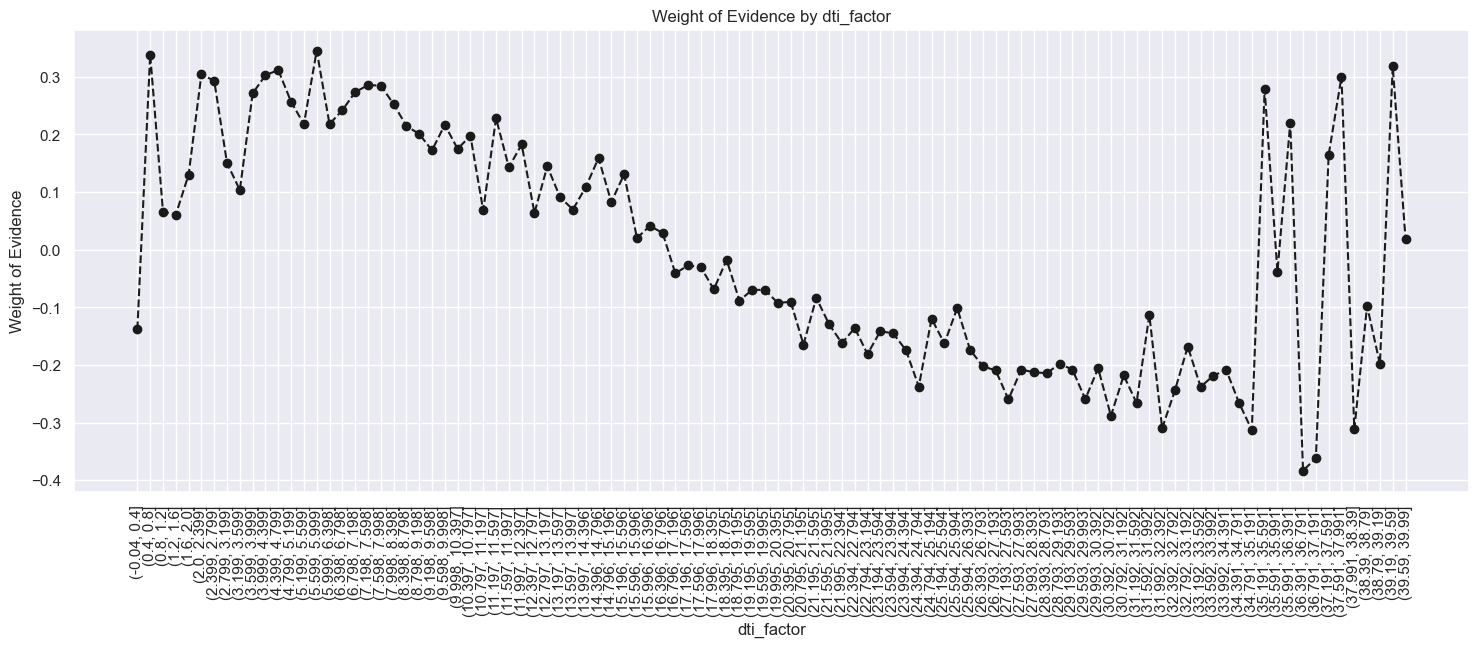

In [184]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [185]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [186]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\337294594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\4022842282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to 

dti_factor  n_obs  prop_bad  prop_n_obs   n_bad   n_good  prop_n_good  \
0   (-0.035, 0.7]   1366  0.105417    0.003690   144.0   1222.0     0.003707   
1      (0.7, 1.4]   1664  0.106971    0.004496   178.0   1486.0     0.004507   
2      (1.4, 2.1]   1986  0.087110    0.005365   173.0   1813.0     0.005499   
3      (2.1, 2.8]   2594  0.086739    0.007008   225.0   2369.0     0.007186   
4      (2.8, 3.5]   3135  0.096970    0.008470   304.0   2831.0     0.008587   
5      (3.5, 4.2]   3844  0.084287    0.010385   324.0   3520.0     0.010677   
6      (4.2, 4.9]   4595  0.085963    0.012414   395.0   4200.0     0.012739   
7      (4.9, 5.6]   5312  0.087349    0.014351   464.0   4848.0     0.014705   
8      (5.6, 6.3]   5927  0.085203    0.016013   505.0   5422.0     0.016446   
9      (6.3, 7.0]   6482  0.088399    0.017512   573.0   5909.0     0.017923   
10     (7.0, 7.7]   7256  0.083241    0.019603   604.0   6652.0     0.020176   
11     (7.7, 8.4]   8120  0.086207    0.021937   700.0   7420.0     0.022506   
12     (8.4, 9.1]   8817  0.091755    0.023820   809.0   8008.0     0.024289   
13     (9.1, 9.8]   9194  0.090929    0.024839   836.0   8358.0     0.025351   
14    (9.8, 10.5]   9888  0.091424    0.026714   904.0   8984.0     0.027250   
15   (10.5, 11.2]  10483  0.099781    0.028321  1046.0   9437.0     0.028624   
16   (11.2, 11.9]  10774  0.091053    0.029107   981.0   9793.0     0.029704   
17   (11.9, 12.6]  11566  0.096490    0.031247  1116.0  10450.0     0.031696   
18   (12.6, 13.3]  11670  0.100257    0.031528  1170.0  10500.0     0.031848   
19   (13.3, 14.0]  12043  0.101055    0.032536  1217.0  10826.0     0.032837   
20   (14.0, 14.7]  12212  0.096626    0.032992  1180.0  11032.0     0.033462   
21   (14.7, 15.4]  11941  0.100327    0.032260  1198.0  10743.0     0.032585   
22   (15.4, 16.1]  12117  0.102501    0.032736  1242.0  10875.0     0.032985   
23   (16.1, 16.8]  12054  0.106935    0.032566  1289.0  10765.0     0.032652   
24   (16.8, 17.5]  12222  0.112911    0.033019  1380.0  10842.0     0.032885   
25   (17.5, 18.2]  11921  0.109638    0.032206  1307.0  10614.0     0.032194   
26   (18.2, 18.9]  11753  0.118693    0.031752  1395.0  10358.0     0.031417   
27   (18.9, 19.6]  11242  0.115638    0.030372  1300.0   9942.0     0.030156   
28   (19.6, 20.3]  11286  0.119174    0.030491  1345.0   9941.0     0.030152   
29   (20.3, 21.0]  10987  0.117685    0.029683  1293.0   9694.0     0.029403   
30   (21.0, 21.7]  10285  0.121828    0.027786  1253.0   9032.0     0.027395   
31   (21.7, 22.4]   9797  0.124222    0.026468  1217.0   8580.0     0.026024   
32   (22.4, 23.1]   9475  0.126016    0.025598  1194.0   8281.0     0.025117   
33   (23.1, 23.8]   9229  0.123957    0.024933  1144.0   8085.0     0.024523   
34   (23.8, 24.5]   8858  0.127681    0.023931  1131.0   7727.0     0.023437   
35   (24.5, 25.2]   8115  0.128897    0.021924  1046.0   7069.0     0.021441   
36   (25.2, 25.9]   6944  0.123704    0.018760   859.0   6085.0     0.018457   
37   (25.9, 26.6]   6676  0.127621    0.018036   852.0   5824.0     0.017665   
38   (26.6, 27.3]   6168  0.130512    0.016664   805.0   5363.0     0.016267   
39   (27.3, 28.0]   5865  0.133504    0.015845   783.0   5082.0     0.015414   
40   (28.0, 28.7]   5588  0.130458    0.015097   729.0   4859.0     0.014738   
41   (28.7, 29.4]   5119  0.132057    0.013830   676.0   4443.0     0.013476   
42   (29.4, 30.1]   4522  0.136002    0.012217   615.0   3907.0     0.011850   
43   (30.1, 30.8]   3451  0.135033    0.009323   466.0   2985.0     0.009054   
44   (30.8, 31.5]   3295  0.135660    0.008902   447.0   2848.0     0.008638   
45   (31.5, 32.2]   2945  0.126655    0.007956   373.0   2572.0     0.007801   
46   (32.2, 32.9]   2617  0.139855    0.007070   366.0   2251.0     0.006828   
47   (32.9, 33.6]   2438  0.129614    0.006587   316.0   2122.0     0.006436   
48   (33.6, 34.3]   2321  0.130116    0.006270   302.0   2019.0     0.006124   
49   (3

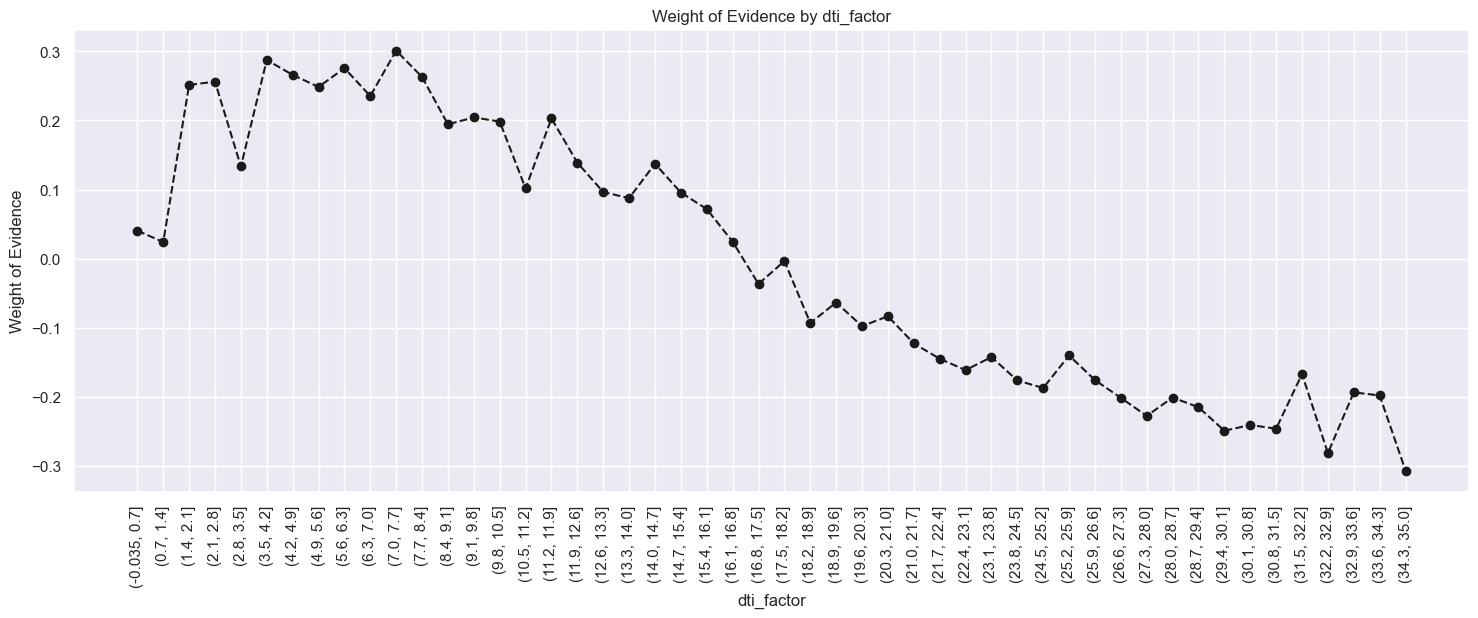

In [187]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [188]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\284476014.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\284476014.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\284476014.py:4: PerformanceWarning: DataFrame is hig

In [189]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3035104871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\3035104871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\40

mths_since_last_record_factor  n_obs  prop_bad  prop_n_obs  n_bad  n_good  \
0                 (-0.121, 2.42]   1086  0.235727    0.021691  256.0   830.0   
1                   (2.42, 4.84]     76  0.105263    0.001518    8.0    68.0   
2                   (4.84, 7.26]    163  0.085890    0.003256   14.0   149.0   
3                   (7.26, 9.68]    156  0.096154    0.003116   15.0   141.0   
4                   (9.68, 12.1]    292  0.092466    0.005832   27.0   265.0   
5                  (12.1, 14.52]    207  0.082126    0.004134   17.0   190.0   
6                 (14.52, 16.94]    210  0.071429    0.004194   15.0   195.0   
7                 (16.94, 19.36]    334  0.092814    0.006671   31.0   303.0   
8                 (19.36, 21.78]    283  0.063604    0.005652   18.0   265.0   
9                  (21.78, 24.2]    455  0.101099    0.009088   46.0   409.0   
10                 (24.2, 26.62]    339  0.094395    0.006771   32.0   307.0   
11                (26.62, 29.04]    612  0.099673    0.012224   61.0   551.0   
12                (29.04, 31.46]    451  0.093126    0.009008   42.0   409.0   
13                (31.46, 33.88]    487  0.078029    0.009727   38.0   449.0   
14                 (33.88, 36.3]    780  0.079487    0.015579   62.0   718.0   
15                 (36.3, 38.72]    659  0.063733    0.013162   42.0   617.0   
16                (38.72, 41.14]   1008  0.077381    0.020133   78.0   930.0   
17                (41.14, 43.56]    812  0.068966    0.016218   56.0   756.0   
18                (43.56, 45.98]    791  0.073325    0.015799   58.0   733.0   
19                 (45.98, 48.4]   1316  0.075228    0.026285   99.0  1217.0   
20                 (48.4, 50.82]    945  0.078307    0.018875   74.0   871.0   
21                (50.82, 53.24]   1536  0.091146    0.030679  140.0  1396.0   
22                (53.24, 55.66]   1062  0.087571    0.021212   93.0   969.0   
23                (55.66, 58.08]   1662  0.084236    0.033196  140.0  1522.0   
24                 (58.08, 60.5]   1095  0.085845    0.021871   94.0  1001.0   
25                 (60.5, 62.92]   1213  0.092333    0.024228  112.0  1101.0   
26                (62.92, 65.34]   1631  0.092581    0.032576  151.0  1480.0   
27                (65.34, 67.76]   1088  0.078125    0.021731   85.0  1003.0   
28                (67.76, 70.18]   1513  0.090549    0.030220  137.0  1376.0   
29                 (70.18, 72.6]   1041  0.093180    0.020792   97.0   944.0   
30                 (72.6, 75.02]   1420  0.100000    0.028362  142.0  1278.0   
31                (75.02, 77.44]    946  0.104651    0.018895   99.0   847.0   
32                (77.44, 79.86]    939  0.095847    0.018755   90.0   849.0   
33                (79.86, 82.28]   1351  0.112509    0.026984  152.0  1199.0   
34                 (82.28, 84.7]    724  0.114641    0.014461   83.0   641.0   
35                 (84.7, 87.12]   1350  0.141481    0.026964  191.0  1159.0   
36                (87.12, 89.54]    822  0.133820    0.016418  110.0   712.0   
37                (89.54, 91.96]    904  0.138274    0.018056  125.0   779.0   
38                (91.96, 94.38]   1492  0.132038    0.029800  197.0  1295.0   
39                 (94.38, 96.8]   1145  0.147598    0.022869  169.0   976.0   
40                 (96.8, 99.22]   1821  0.115870    0.036371  211.0  1610.0   
41               (99.22, 101.64]   1258  0.136725    0.025126  172.0  1086.0   
42              (101.64, 104.06]   2096  0.121660    0.041864  255.0  1841.0   
43              (104.06, 106.48]   1536  0.126953    0.030679  195.0  1341.0   
44               (106.48, 108.9]   1559  0.115459    0.031138  180.0  1379.0   
45               (108.9, 111.32]   2296  0.115854    0.045859  266.0  2030.0   
46              (111.32, 113.74]   1461  0.112936    0.029181  165.0  1296.0   
47              (113.74, 116.16]   2037  0.132057    0.040685  269.0  1768.0   
48              (116.16, 118.58]   1236  0.093851    0.024687  116.0  1120.0   
49 

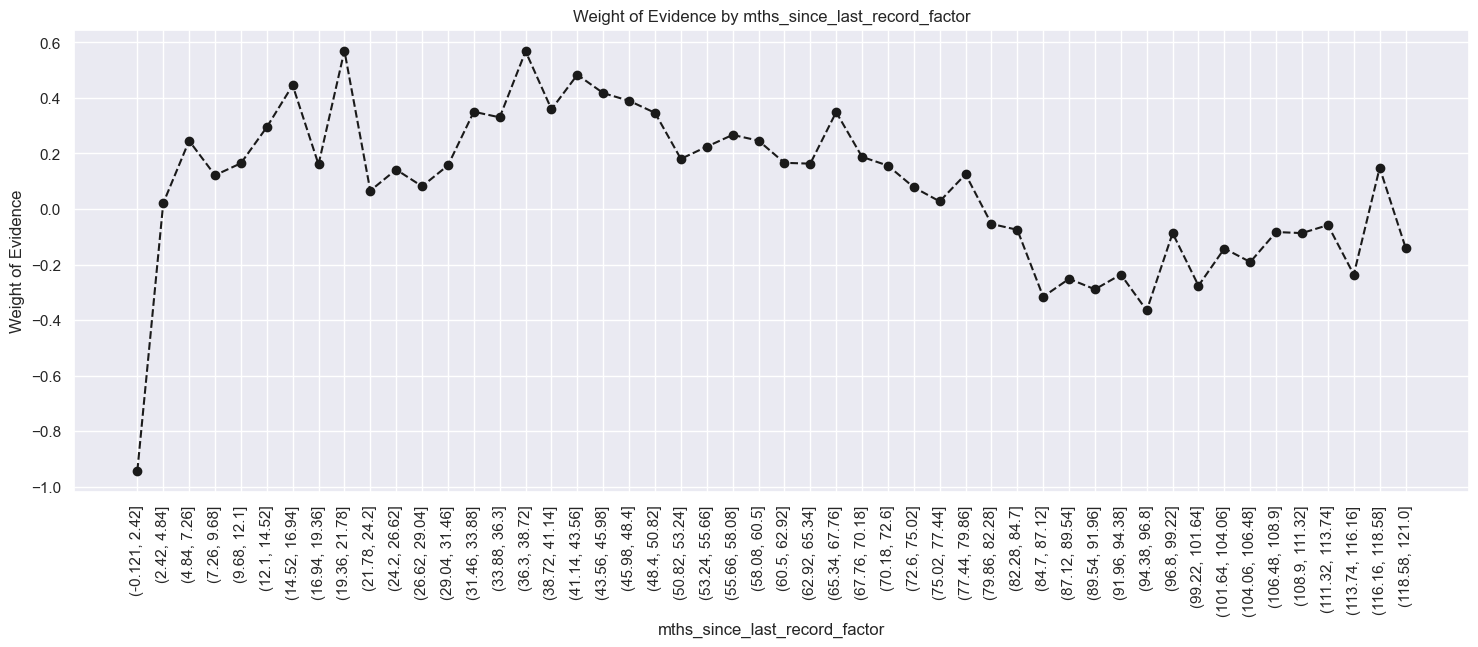

In [190]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [191]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\1059239224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\1059239224.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\Users\Pier

### Preprocessing the Test Dataset

In [193]:
#####
loan_data_inputs_train = df_inputs_prepr
##### save the data


In [194]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test


In [195]:
# We apply the same dummy variables to the Test data.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])


if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])


df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'] < 38, 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 84)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'] > 84, 1, 0)


df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)


df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3), 1, 0)

df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)


df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\2030185006.py:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_14860\2030185006.py:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
C:\Users\Pierre 

In [196]:
loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')